# KAGGLE COMPETITION

# HMS - Harmful Brain Activity Classification

### IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [ ]:
df = pd.read_csv("eeg_train.csv")

In [ ]:
df.head()

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                         0          353733   
1  1628180742           1                         6          353733   
2  1628180742           2                         8          353733   
3  1628180742           3                        18          353733   
4  1628180742           4                        24          353733   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                                 0   127492639   
1                   1                                 6  3887563113   
2                   2                                 8  1142670488   
3                   3                                18  2718991173   
4                   4                                24  3080632009   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0          0   
1       42516          Seizure             3         0         0          0   
2       42516          Seizure             3         0         0          0   
3       42516          Seizure             3         0         0          0   
4       42516          Seizure             3         0         0          0   

   grda_vote  other_vote  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           0

### BASIC CHECKS

In [ ]:
df.tail()

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
106795  351917269           6                        12      2147388374   
106796  351917269           7                        14      2147388374   
106797  351917269           8                        16      2147388374   
106798  351917269           9                        18      2147388374   
106799  351917269          10                        20      2147388374   

        spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
106795                   6                                12  4195677307   
106796                   7                                14   290896675   
106797                   8                                16   461435451   
106798                   9                                18  3786213131   
106799                  10                                20  3642716176   

        patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  \
106795       10351             LRDA             0         0         0   
106796       10351             LRDA             0         0         0   
106797       10351             LRDA             0         0         0   
106798       10351             LRDA             0         0         0   
106799       10351             LRDA             0         0         0   

        lrda_vote  grda_vote  other_vote  
106795          3          0           0  
106796          3          0           0  
106797          3          0           0  
106798          3          0           0  
106799          3          0           0

In [ ]:
df.shape

(106800, 15)

In [ ]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'],
      dtype='object')

## DATA ANALYSIS

1. **`eeg_id`**: Unique identifier for the entire EEG recording. It represents a specific EEG session or recording from a patient.

2. **`eeg_sub_id`**: An ID for the specific 50-second long subsample to which the row's labels apply. This column helps identify a particular subset or segment within the larger EEG recording.

3. **`eeg_label_offset_seconds`**: The time between the beginning of the consolidated EEG and the subsample. It indicates the time offset for the EEG subsample within the entire EEG recording.

4. **`spectrogram_id`**: Unique identifier for the entire EEG recording, similar to `eeg_id`. It is related to the spectrogram data.

5. **`spectrogram_sub_id`**: An ID for the specific 10-minute subsample to which the row's labels apply. This corresponds to a subset within the larger spectrogram data.

6. **`spectrogram_label_offset_seconds`**: The time between the beginning of the consolidated spectrogram and the subsample. It indicates the time offset for the spectrogram subsample within the entire spectrogram recording.

7. **`label_id`**: An ID for this set of labels. It helps distinguish different sets of labels within the dataset.

8. **`patient_id`**: An ID for the patient who donated the data. It uniquely identifies each patient.

9. **`expert_consensus`**: The consensus annotator label for convenience. This column may provide a summary or agreement among expert annotators regarding the type of brain activity in the given subsample.

10. **`seizure_vote`**, **`lpd_vote`**, **`gpd_vote`**, **`lrda_vote`**, **`grda_vote`**, **`other_vote`**: These columns represent the count of annotator votes for specific brain activity classes. The classes are:
    - `seizure_vote`: Count of votes for seizure.
    - `lpd_vote`: Count of votes for lateralized periodic discharges.
    - `gpd_vote`: Count of votes for generalized periodic discharges.
    - `lrda_vote`: Count of votes for lateralized rhythmic delta activity.
    - `grda_vote`: Count of votes for generalized rhythmic delta activity.
    - `other_vote`: Count of votes for other types of brain activity.

11. **Target Variable**: The target variable in this dataset is the actual brain activity class for each subsample. It could be any of the following:
    - Seizure (`seizure_vote`): Represents the count of votes for seizure.
    - Lateralized Periodic Discharges (`lpd_vote`): Represents the count of votes for lateralized periodic discharges.
    - Generalized Periodic Discharges (`gpd_vote`): Represents the count of votes for generalized periodic discharges.
    - Lateralized Rhythmic Delta Activity (`lrda_vote`): Represents the count of votes for lateralized rhythmic delta activity.
    - Generalized Rhythmic Delta Activity (`grda_vote`): Represents the count of votes for generalized rhythmic delta activity.
    - Other (`other_vote`): Represents the count of votes for other types of brain activity.

The target variable is the type of brain activity class (seizure, lpd, gpd, lrda, grda, other), and the goal of the competition or analysis is likely to predict or classify the correct brain activity class for each EEG subsample.

In [ ]:
df.isnull().sum()

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

In [ ]:
df.nunique()

eeg_id                               17089
eeg_sub_id                             743
eeg_label_offset_seconds              1502
spectrogram_id                       11138
spectrogram_sub_id                    1022
spectrogram_label_offset_seconds      4686
label_id                            106800
patient_id                            1950
expert_consensus                         6
seizure_vote                            18
lpd_vote                                19
gpd_vote                                17
lrda_vote                               16
grda_vote                               16
other_vote                              26
dtype: int64

In [ ]:
object_columns = df.select_dtypes(include=['object', 'bool']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['expert_consensus'], dtype='object')

Numerical type columns:
Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote',
       'grda_vote', 'other_vote'],
      dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype in ['object', 'bool']:
            if df[column].nunique() < 15:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['expert_consensus']
Non-Categorical Features: []
Discrete Features: []
Continuous Features: ['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id', 'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id', 'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


In [ ]:
for i in categorical:
    print(i, ':')
    print(df[i].unique())
    print()

expert_consensus :
['Seizure' 'GPD' 'LRDA' 'Other' 'GRDA' 'LPD']



In [ ]:
for i in categorical:
    print(i, ':')
    print(df[i].value_counts())
    print()

expert_consensus :
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: expert_consensus, dtype: int64



## EXPLORATORY DATA ANALYSIS

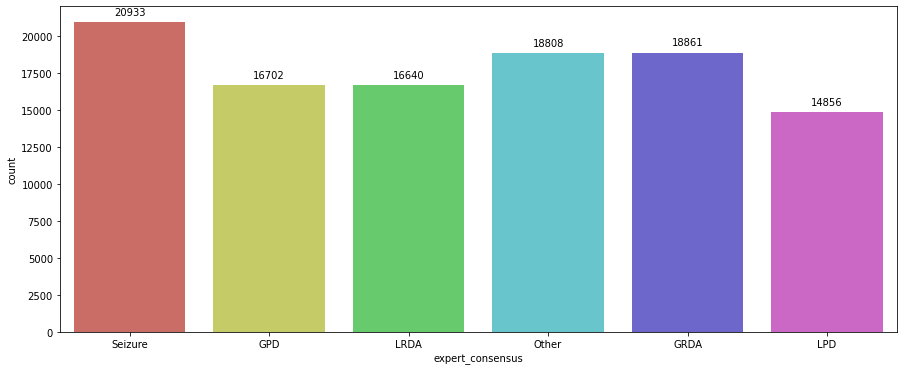

In [ ]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

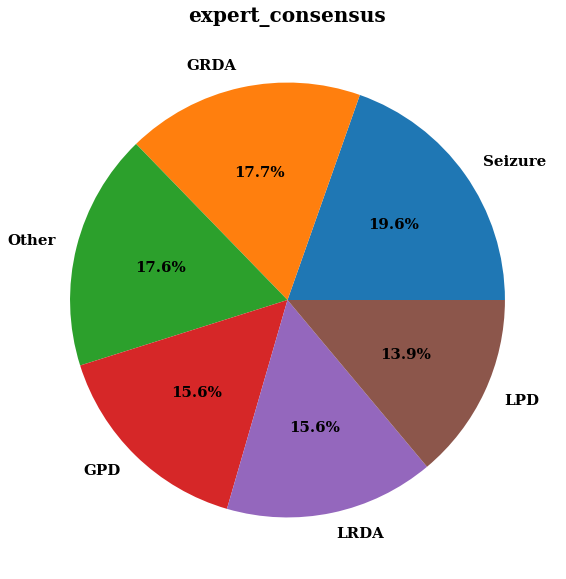

In [ ]:
for i in categorical:
    plt.figure(figsize=(20,10))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont)
    plt.show()

In [ ]:
votes_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
df_votes = df[votes_columns].melt(var_name='Brain Activity', value_name='Votes')

1. **`votes_columns`**: This is a list containing the names of columns in your original DataFrame (`df`) that represent the counts of votes for different brain activity classes. Each element in the list corresponds to a specific brain activity class.

2. **`df_votes`**: This line creates a new DataFrame (`df_votes`) by selecting only the columns specified in `votes_columns` from the original DataFrame (`df`). The selected columns are essentially the counts of votes for different brain activity classes.

3. **`.melt(var_name='Brain Activity', value_name='Votes')`**: This part of the code transforms the DataFrame from wide format to long format using the `melt` function. It takes the selected columns (`votes_columns`) and "melts" or unpivots them, creating two new columns:
   - `Brain Activity`: This column stores the variable names from the original DataFrame (`df`) that represent different brain activity classes (e.g., 'seizure_vote', 'lpd_vote', etc.).
   - `Votes`: This column stores the corresponding values (vote counts) for each brain activity class.

In [ ]:
df_votes

Brain Activity  Votes
0        seizure_vote      3
1        seizure_vote      3
2        seizure_vote      3
3        seizure_vote      3
4        seizure_vote      3
...               ...    ...
640795     other_vote      0
640796     other_vote      0
640797     other_vote      0
640798     other_vote      0
640799     other_vote      0

[640800 rows x 2 columns]

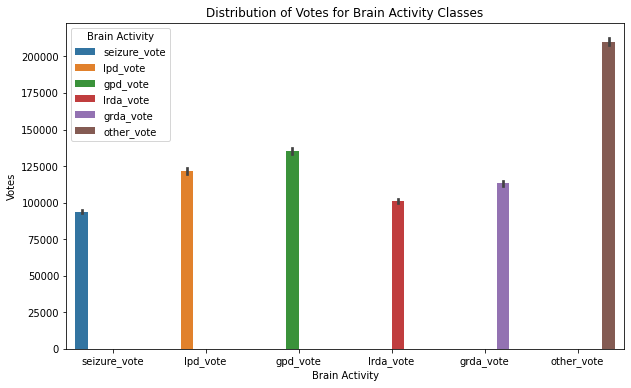

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Brain Activity', y='Votes', hue='Brain Activity', data=df_votes, estimator=sum)
plt.title('Distribution of Votes for Brain Activity Classes')
plt.show()

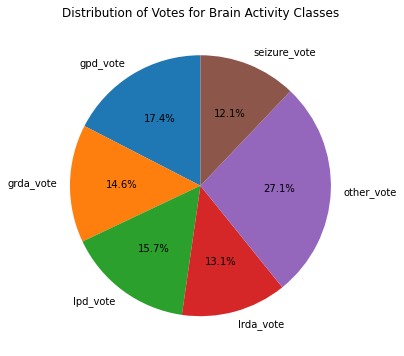

In [ ]:
votes_sum = df_votes.groupby('Brain Activity')['Votes'].sum()

plt.figure(figsize=(10, 6))
plt.pie(votes_sum, labels=votes_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Votes for Brain Activity Classes')
plt.show()

In [ ]:
df_vote_columns = df[votes_columns]

In [ ]:
pivot_table_continuous = pd.pivot_table(df, values=continuous, index='expert_consensus', aggfunc='mean', fill_value=0)
pivot_table_continuous

eeg_id  eeg_label_offset_seconds  eeg_sub_id  \
expert_consensus                                                       
GPD               2.112607e+09                271.789007   60.594001   
GRDA              2.122264e+09                164.003181   34.889295   
LPD               2.009430e+09                105.365778   14.422052   
LRDA              2.060360e+09                111.167668   41.686238   
Other             2.148688e+09                 25.629307    3.607295   
Seizure           2.144307e+09                 55.406105    7.715951   

                  gpd_vote  grda_vote      label_id  lpd_vote  lrda_vote  \
expert_consensus                                                           
GPD               7.136630   0.327685  2.137788e+09  0.465932   0.056161   
GRDA              0.196119   4.516569  2.139416e+09  0.101161   0.252214   
LPD               0.275714   0.110057  2.135262e+09  6.303177   0.652329   
LRDA              0.076082   0.437500  2.142999e+09  0.469712   4.535697   
Other             0.291631   0.702573  2.143698e+09  0.471874   0.507337   
Seizure           0.064587   0.015860  2.147165e+09  0.076482   0.041848   

                  other_vote    patient_id  seizure_vote  spectrogram_id  \
expert_consensus                                                           
GPD                 0.977967  30894.480362      1.073823    1.012988e+09   
GRDA                0.974286  31341.035947      0.030751    1.115632e+09   
LPD                 0.982970  33153.806745      0.272079    1.081675e+09   
LRDA                1.351863  33981.688041      0.141286    1.046095e+09   
Other               7.204275  33263.351287      0.155997    1.073661e+09   
Seizure             0.128649  31499.771652      3.149620    1.067833e+09   

                  spectrogram_label_offset_seconds  spectrogram_sub_id  
expert_consensus                                                        
GPD                                     681.736199           75.243384  
GRDA                                    303.706590           44.237951  
LPD                                    1248.156637           67.645665  
LRDA                                    516.924760           61.317127  
Other                                   346.593258           13.892333  
Seizure                                 229.519753           14.002436

1. **eeg_id:**
   - GPD has an average EEG recording identifier of approximately 2.1126e+09.
   - Other classes have varying average EEG recording identifiers.

   **Interpretation:** The average EEG recording identifier may not provide direct insights into the characteristics of brain activity classes.

2. **eeg_label_offset_seconds:**
   - GPD has an average EEG label offset of approximately 271.79 seconds.
   - Other classes have varying average EEG label offsets.

   **Interpretation:** GPD tends to have EEG signals labeled around 271.79 seconds, suggesting a specific temporal pattern associated with this class.

3. **spectrogram_id:**
   - GPD has an average spectrogram identifier of approximately 1.01299e+09.
   - Other classes have varying average spectrogram identifiers.

   **Interpretation:** The average spectrogram identifier for GPD may indicate a specific pattern or set of characteristics in the spectrogram associated with this class.

4. **seizure_vote:**
   - Seizure has the highest average vote count, indicating a higher level of agreement among annotators for this class.
   - Other classes have lower average vote counts.

   **Interpretation:** Seizure tends to have a higher level of agreement among annotators, suggesting that it might be a more easily identifiable brain activity class compared to others.

These interpretations provide a high-level understanding of the average characteristics associated with different brain activity classes based on the provided features. It's important to note that further in-depth analysis and domain expertise may be required to draw more specific conclusions about the significance of these averages in the context of EEG signal processing and brain activity classification.

In [ ]:
df['Brain Activity'] = df[votes_columns].idxmax(axis=1).apply(lambda x: x.replace('_vote', ''))

In [ ]:
df

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0       1628180742           0                         0          353733   
1       1628180742           1                         6          353733   
2       1628180742           2                         8          353733   
3       1628180742           3                        18          353733   
4       1628180742           4                        24          353733   
...            ...         ...                       ...             ...   
106795   351917269           6                        12      2147388374   
106796   351917269           7                        14      2147388374   
106797   351917269           8                        16      2147388374   
106798   351917269           9                        18      2147388374   
106799   351917269          10                        20      2147388374   

        spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                        0                                 0   127492639   
1                        1                                 6  3887563113   
2                        2                                 8  1142670488   
3                        3                                18  2718991173   
4                        4                                24  3080632009   
...                    ...                               ...         ...   
106795                   6                                12  4195677307   
106796                   7                                14   290896675   
106797                   8                                16   461435451   
106798                   9                                18  3786213131   
106799                  10                                20  3642716176   

        patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  \
0            42516          Seizure             3         0         0   
1            42516          Seizure             3         0         0   
2            42516          Seizure             3         0         0   
3            42516          Seizure             3         0         0   
4            42516          Seizure             3         0         0   
...            ...              ...           ...       ...       ...   
106795       10351             LRDA             0         0         0   
106796       10351             LRDA             0         0         0   
106797       10351             LRDA             0         0         0   
106798       10351             LRDA             0         0         0   
106799       10351             LRDA             0         0         0   

        lrda_vote  grda_vote  other_vote Brain Activity  
0               0          0           0        seizure  
1               0          0           0        seizure  
2               0          0           0        seizure  
3               0          0           0        seizure  
4               0          0           0        seizure  
...           ...        ...         ...            ...  
106795          3          0           0           lrda  
106796          3          0           0           lrda  
106797          3          0           0           lrda  
106798          3          0           0           lrda  
106799          3          0           0           lrda  

[106800 rows x 16 columns]

In [ ]:
grouped_continuous = df.groupby('eeg_id')[continuous].mean().reset_index(drop=True)
grouped_continuous

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0      5.686570e+05         1.5                  8.500000    7.895773e+08   
1      5.829990e+05         5.0                 17.454545    1.552638e+09   
2      6.423820e+05         0.5                 12.000000    1.496020e+07   
3      7.517900e+05         0.0                  0.000000    6.187284e+08   
4      7.787050e+05         0.0                  0.000000    5.229632e+07   
...             ...         ...                       ...             ...   
17084  4.293354e+09         0.0                  0.000000    1.188114e+09   
17085  4.293843e+09         0.0                  0.000000    1.549503e+09   
17086  4.294455e+09         0.0                  0.000000    2.105480e+09   
17087  4.294859e+09         2.0                  5.600000    6.572992e+08   
17088  4.294958e+09         0.0                  0.000000    2.605200e+08   

       spectrogram_sub_id  spectrogram_label_offset_seconds      label_id  \
0                     1.5                          8.500000  2.176284e+09   
1                     5.0                         17.454545  1.677750e+09   
2                    12.5                       1020.000000  2.903413e+09   
3                     4.0                        908.000000  2.898467e+09   
4                     0.0                          0.000000  3.255875e+09   
...                   ...                               ...           ...   
17084                 0.0                          0.000000  4.472442e+08   
17085                 0.0                          0.000000  1.618953e+09   
17086                 0.0                          0.000000  4.695264e+08   
17087                 2.0                          5.600000  2.652198e+09   
17088                 9.0                       2508.000000  2.788887e+09   

       patient_id  seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  \
0         20654.0           0.0       0.0       3.0        0.0        2.0   
1         20230.0           0.0      12.0       0.0        1.0        0.0   
2          5955.0           0.0       0.0       0.0        0.0        0.0   
3         38549.0           0.0       0.0       1.0        0.0        0.0   
4         40955.0           0.0       0.0       0.0        0.0        0.0   
...           ...           ...       ...       ...        ...        ...   
17084     16610.0           0.0       0.0       0.0        0.0        1.0   
17085     15065.0           0.0       0.0       0.0        0.0        1.0   
17086        56.0           0.0       0.0       0.0        0.0        0.0   
17087      4312.0           0.0       0.0       0.0        0.0        1.0   
17088     25986.0           0.0       0.0       0.0        0.0        0.0   

       other_vote  
0             7.0  
1             1.0  
2             1.0  
3             0.0  
4             2.0  
...           ...  
17084         1.0  
17085         1.0  
17086         1.0  
17087        14.0  
17088         2.0  

[17089 rows x 14 columns]

In [ ]:
targets = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

In [ ]:
total_votes_per_pat = df.groupby('patient_id')[targets].sum().sum(axis=1)
normalized_votes = df.groupby('patient_id')[targets].sum().div(total_votes_per_pat, axis=0)
mean_vote_ratio = normalized_votes.mean()
print( mean_vote_ratio )

seizure_vote    0.310718
lpd_vote        0.046279
gpd_vote        0.051885
lrda_vote       0.081796
grda_vote       0.231471
other_vote      0.277851
dtype: float64


In [ ]:
target_eeg_id = 1000913311
df_filtered = df[df['eeg_id'] == target_eeg_id]
df_filtered

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
9529  1000913311           0                         0       175871552   

      spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
9529                   0                                 0  3905268514   

      patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  \
9529       59743            Other             0         0         0   

      lrda_vote  grda_vote  other_vote Brain Activity  
9529          0          0           2          other

In [ ]:
df_filtered = pd.read_parquet('1000913311.parquet')

In [ ]:
df_filtered

Fp1          F3          C3          P3          F7          T3  \
0    -105.849998  -89.230003  -79.459999  -49.230000  -99.730003  -87.769997   
1     -85.470001  -75.070000  -60.259998  -38.919998  -73.080002  -87.510002   
2       8.840000   34.849998   56.430000   67.970001   48.099998   25.350000   
3     -56.320000  -37.279999  -28.100000   -2.820000  -43.430000  -35.049999   
4    -110.139999 -104.519997  -96.879997  -70.250000 -111.660004 -114.430000   
...          ...         ...         ...         ...         ...         ...   
9995  -45.540001  -26.459999  -23.209999  -25.250000  -21.559999  -36.549999   
9996  -26.860001    4.350000    7.410000    7.830000    5.260000    7.750000   
9997 -133.759995 -111.190002 -119.180000 -105.760002 -130.039993 -104.059998   
9998  -78.889999  -59.660000  -60.770000  -59.810001  -63.020000  -60.020000   
9999    3.780000   36.009998   41.060001   34.389999   42.340000   37.709999   

             T5         O1         Fz         Cz         Pz         Fp2  \
0    -53.330002 -50.740002 -32.250000 -42.099998 -43.270000  -88.730003   
1    -39.680000 -35.630001 -76.839996 -62.740002 -43.040001  -68.629997   
2     80.250000  48.060001   6.720000  37.880001  61.000000   16.580000   
3      3.910000 -12.660000   8.650000   3.830000   4.180000  -51.900002   
4    -71.830002 -61.919998 -76.150002 -79.779999 -67.480003  -99.029999   
...         ...        ...        ...        ...        ...         ...   
9995  10.730000 -16.290001 -55.919998 -28.670000 -29.770000  -22.000000   
9996  50.130001   4.150000   1.720000  22.100000   7.150000   -6.820000   
9997 -68.290001 -86.480003 -57.130001 -68.830002 -95.839996 -107.540001   
9998 -20.690001 -42.820000 -68.669998 -54.740002 -62.810001  -52.869999   
9999  78.510002  28.770000   9.520000  38.189999  28.389999   22.920000   

             F4          C4         P4         F8         T4          T6  \
0    -74.410004  -92.459999 -58.930000 -75.739998 -59.470001    8.210000   
1    -61.689999  -69.320000 -35.790001 -58.900002 -41.660000  196.190002   
2     55.060001   45.020000  70.529999  47.820000  72.029999  -67.180000   
3    -21.889999  -41.330002 -11.580000 -27.040001 -11.730000  -91.000000   
4    -93.610001 -104.410004 -70.070000 -89.250000 -77.260002  155.729996   
...         ...         ...        ...        ...        ...         ...   
9995   3.710000    8.470000   0.480000   9.950000  33.959999  110.510002   
9996  38.070000   32.880001  21.990000  32.990002  60.209999 -156.949997   
9997 -86.449997  -94.099998 -97.050003 -86.339996 -68.040001  -14.880000   
9998 -34.099998  -31.500000 -37.810001 -32.259998 -10.870000  137.559998   
9999  69.970001   69.220001  53.160000  61.549999  90.910004 -115.550003   

              O2          EKG  
0      66.489998  1404.930054  
1     230.669998  3402.669922  
2    -171.309998 -3565.800049  
3     -81.190002 -1280.930054  
4     264.850006  4325.370117  
...          ...          ...  
9995   58.599998   301.239990  
9996 -275.929993 -4634.799805  
9997   66.440002  1667.800049  
9998  193.839996  2743.379883  
9999 -224.050003 -4185.600098  

[10000 rows x 20 columns]

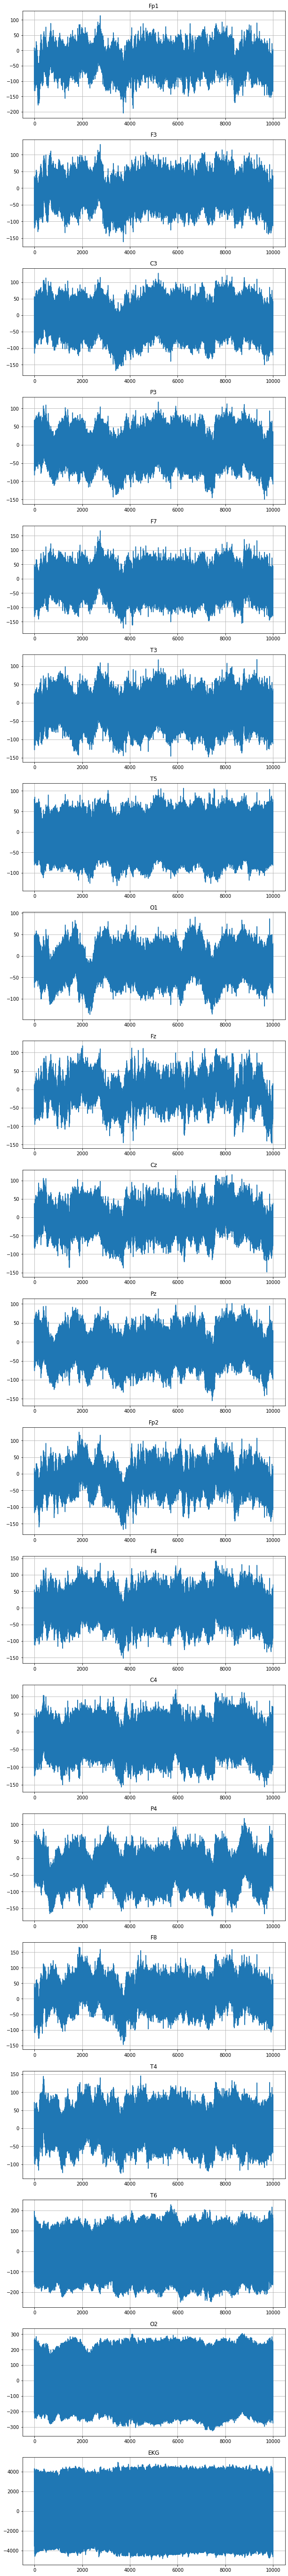

In [ ]:
fig, ax = plt.subplots(20, figsize=(10, 100))

for i, column in enumerate(df_filtered.columns):
    ax[i].plot(df_filtered.index, df_filtered[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

Data has a lot of peaks and troughs, indicating a high variation
The scale of most of the plots ranging from -200 to 100, excluding EKG chart
The line seems to fluctuate above and below a central value, which seems to be around zero value

In [ ]:
df_filtered.shape

(10000, 20)

In [ ]:
df_filtered.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG'],
      dtype='object')

The list of labels you provided appears to represent different electrode locations in an electroencephalography (EEG) recording setup. Each label corresponds to a specific position on the scalp where electrodes are placed to capture electrical activity from different regions of the brain. Let's break down each label:

1. **Fp1 and Fp2:**
   - These are frontal polar electrodes.
   - Positioned on the forehead, they capture electrical activity from the frontal lobes, which are associated with cognitive functions, decision-making, and personality.

2. **F3, F4, F7, and F8:**
   - These electrodes are located in the frontal region.
   - They capture electrical signals from the frontal lobes, contributing to the analysis of cognitive processes and emotional states.

3. **C3 and C4:**
   - These are central electrodes.
   - Positioned over the central region of the scalp, they record activity from the central sulcus area, involved in motor control and sensory processing.

4. **P3 and P4:**
   - These electrodes are located in the parietal region.
   - They capture signals related to sensory processing, spatial awareness, and interpretation of visual information.

5. **Fz, Cz, and Pz:**
   - These are midline electrodes located at the vertex (top) of the head.
   - Fz captures activity from the frontal midline, Cz from the central midline, and Pz from the parietal midline. These are important for analyzing midline brain functions.

6. **T3, T4, T5, and T6:**
   - These electrodes are positioned in the temporal region.
   - They record electrical activity from the temporal lobes, which are involved in auditory processing, memory, and language.

7. **O1 and O2:**
   - These electrodes are located in the occipital region.
   - They capture signals from the occipital lobes, primarily responsible for visual processing.

8. **EKG:**
   - This electrode records electrocardiogram (EKG or ECG) signals from the heart.
   - While not directly related to brain activity, it is often included in EEG setups to monitor cardiac activity, allowing for correlation with potential physiological effects on the EEG.

These electrode locations collectively provide a comprehensive view of brain activity, enabling the analysis of different cognitive and sensory functions. EEG recordings from these electrodes help researchers and clinicians understand brain dynamics and detect abnormalities in various neurological conditions.

In [ ]:
df1 = df_filtered

In [ ]:
df1['Brain Activity'] = 'other'

In [ ]:
df1

Fp1          F3          C3          P3          F7          T3  \
0    -105.849998  -89.230003  -79.459999  -49.230000  -99.730003  -87.769997   
1     -85.470001  -75.070000  -60.259998  -38.919998  -73.080002  -87.510002   
2       8.840000   34.849998   56.430000   67.970001   48.099998   25.350000   
3     -56.320000  -37.279999  -28.100000   -2.820000  -43.430000  -35.049999   
4    -110.139999 -104.519997  -96.879997  -70.250000 -111.660004 -114.430000   
...          ...         ...         ...         ...         ...         ...   
9995  -45.540001  -26.459999  -23.209999  -25.250000  -21.559999  -36.549999   
9996  -26.860001    4.350000    7.410000    7.830000    5.260000    7.750000   
9997 -133.759995 -111.190002 -119.180000 -105.760002 -130.039993 -104.059998   
9998  -78.889999  -59.660000  -60.770000  -59.810001  -63.020000  -60.020000   
9999    3.780000   36.009998   41.060001   34.389999   42.340000   37.709999   

             T5         O1         Fz         Cz  ...         Fp2         F4  \
0    -53.330002 -50.740002 -32.250000 -42.099998  ...  -88.730003 -74.410004   
1    -39.680000 -35.630001 -76.839996 -62.740002  ...  -68.629997 -61.689999   
2     80.250000  48.060001   6.720000  37.880001  ...   16.580000  55.060001   
3      3.910000 -12.660000   8.650000   3.830000  ...  -51.900002 -21.889999   
4    -71.830002 -61.919998 -76.150002 -79.779999  ...  -99.029999 -93.610001   
...         ...        ...        ...        ...  ...         ...        ...   
9995  10.730000 -16.290001 -55.919998 -28.670000  ...  -22.000000   3.710000   
9996  50.130001   4.150000   1.720000  22.100000  ...   -6.820000  38.070000   
9997 -68.290001 -86.480003 -57.130001 -68.830002  ... -107.540001 -86.449997   
9998 -20.690001 -42.820000 -68.669998 -54.740002  ...  -52.869999 -34.099998   
9999  78.510002  28.770000   9.520000  38.189999  ...   22.920000  69.970001   

              C4         P4         F8         T4          T6          O2  \
0     -92.459999 -58.930000 -75.739998 -59.470001    8.210000   66.489998   
1     -69.320000 -35.790001 -58.900002 -41.660000  196.190002  230.669998   
2      45.020000  70.529999  47.820000  72.029999  -67.180000 -171.309998   
3     -41.330002 -11.580000 -27.040001 -11.730000  -91.000000  -81.190002   
4    -104.410004 -70.070000 -89.250000 -77.260002  155.729996  264.850006   
...          ...        ...        ...        ...         ...         ...   
9995    8.470000   0.480000   9.950000  33.959999  110.510002   58.599998   
9996   32.880001  21.990000  32.990002  60.209999 -156.949997 -275.929993   
9997  -94.099998 -97.050003 -86.339996 -68.040001  -14.880000   66.440002   
9998  -31.500000 -37.810001 -32.259998 -10.870000  137.559998  193.839996   
9999   69.220001  53.160000  61.549999  90.910004 -115.550003 -224.050003   

              EKG  Brain Activity  
0     1404.930054           other  
1     3402.669922           other  
2    -3565.800049           other  
3    -1280.930054           other  
4     4325.370117           other  
...           ...             ...  
9995   301.239990           other  
9996 -4634.799805           other  
9997  1667.800049           other  
9998  2743.379883           other  
9999 -4185.600098           other  

[10000 rows x 21 columns]

In [ ]:
electrodes = ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']

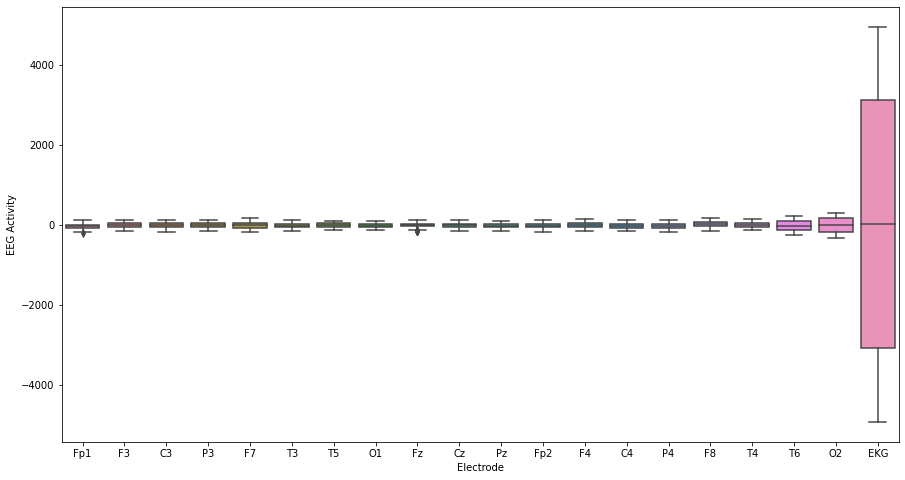

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[electrodes])
plt.xlabel('Electrode')
plt.ylabel('EEG Activity')
plt.show()

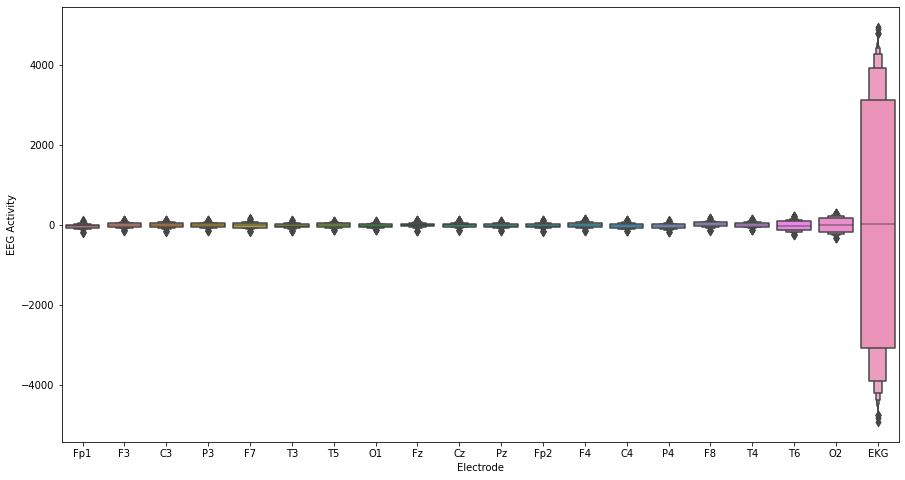

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxenplot(data=df1[electrodes])
plt.xlabel('Electrode')
plt.ylabel('EEG Activity')
plt.show()

In [ ]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote', 'Brain Activity'],
      dtype='object')

In [ ]:
unique_eeg_ids = df.drop_duplicates(subset='Brain Activity')['eeg_id'].tolist()
print(unique_eeg_ids)

[1628180742, 2277392603, 722738444, 1202099836, 2578018731, 736446371]


In [ ]:
eeg_activity_dict = {}

for eeg_id in unique_eeg_ids:
    subset_df = df[df['eeg_id'] == eeg_id]

    unique_brain_activity = subset_df['Brain Activity'].unique()

    if len(unique_brain_activity) == 1:
        eeg_activity_dict[eeg_id] = unique_brain_activity[0]

print(eeg_activity_dict)

{1628180742: 'seizure', 2277392603: 'gpd', 722738444: 'lrda', 1202099836: 'other', 736446371: 'lpd'}


1. `eeg_activity_dict = {}`: Initializes an empty dictionary to store EEG IDs and their corresponding brain activities.

2. `for eeg_id in unique_eeg_ids:`: Iterates through each unique EEG ID.

3. `subset_df = df[df['eeg_id'] == eeg_id]`: Creates a subset DataFrame (`subset_df`) containing only rows where the 'eeg_id' column matches the current `eeg_id`.

4. `unique_brain_activity = subset_df['Brain Activity'].unique()`: Extracts unique values from the 'Brain Activity' column within the subset DataFrame.

5. `if len(unique_brain_activity) == 1:`: Checks if there is only one unique brain activity in the subset.

6. `eeg_activity_dict[eeg_id] = unique_brain_activity[0]`: If there is only one unique brain activity, it adds an entry to the dictionary with the EEG ID as the key and the unique brain activity as the value.

7. Finally, the dictionary `eeg_activity_dict` contains mappings from unique EEG IDs to their corresponding unique brain activities.

In [ ]:
df1 = pd.read_parquet('1628180742.parquet')

In [ ]:
df2 = pd.read_parquet('736446371.parquet')

In [ ]:
df3 = pd.read_parquet('722738444.parquet')

In [ ]:
df4 = pd.read_parquet('1202099836.parquet')

In [ ]:
df5 = pd.read_parquet('2578018731.parquet')

In [ ]:
df6 = pd.read_parquet('2277392603.parquet')

In [ ]:
df1['Brain Activity'] = 'seizure'

In [ ]:
df2['Brain Activity'] = 'lpd'

In [ ]:
df3['Brain Activity'] = 'lrda'

In [ ]:
df4['Brain Activity'] = 'other'

In [ ]:
df5['Brain Activity'] = 'grda'

In [ ]:
df6['Brain Activity'] = 'gpd'

In [ ]:
df1

Fp1          F3          C3          P3          F7          T3  \
0      -80.519997  -70.540001  -80.110001 -108.750000 -120.330002  -88.620003   
1      -80.449997  -70.330002  -81.760002 -107.669998 -120.769997  -90.820000   
2      -80.209999  -75.870003  -82.050003 -106.010002 -117.500000  -87.489998   
3      -84.709999  -75.339996  -87.480003 -108.970001 -121.410004  -94.750000   
4      -90.570000  -80.790001  -93.000000 -113.870003 -129.960007 -102.860001   
...           ...         ...         ...         ...         ...         ...   
17995 -144.660004 -147.809998 -129.820007 -129.460007 -157.509995 -124.000000   
17996 -140.880005 -153.000000 -129.529999 -129.020004 -154.059998 -131.220001   
17997 -133.729996 -141.770004 -121.900002 -122.370003 -158.750000 -123.550003   
17998 -141.449997 -151.139999 -127.190002 -128.699997 -163.460007 -124.309998   
17999 -138.669998 -147.210007 -122.820000 -128.289993 -164.869995 -124.239998   

               T5          O1          Fz          Cz  ...         Fp2  \
0     -101.750000 -104.489998  -99.129997  -90.389999  ...  -77.989998   
1     -104.260002  -99.730003  -99.070000  -92.290001  ...  -84.500000   
2      -99.589996  -96.820000 -119.680000  -99.360001  ...  -99.440002   
3     -105.370003 -100.279999 -113.839996 -102.059998  ...  -99.230003   
4     -118.599998 -101.099998 -107.660004 -102.339996  ...  -95.300003   
...           ...         ...         ...         ...  ...         ...   
17995 -124.570000  -94.820000 -153.070007 -121.110001  ... -132.520004   
17996 -128.380005  -95.000000 -140.820007 -114.639999  ... -115.339996   
17997 -127.730003  -93.089996 -125.230003 -106.489998  ... -112.720001   
17998 -129.479996  -94.419998 -140.869995 -113.339996  ... -129.300003   
17999 -129.339996  -95.320000 -136.789993 -112.820000  ... -129.380005   

               F4          C4          P4          F8         T4          T6  \
0      -88.830002 -112.120003 -108.110001  -95.949997 -98.360001 -121.730003   
1      -84.989998 -115.610001 -103.860001  -97.470001 -89.290001 -115.500000   
2     -104.589996 -127.529999 -113.349998  -95.870003 -96.019997 -123.879997   
3     -101.220001 -125.769997 -111.889999  -97.459999 -97.180000 -128.940002   
4      -88.930000 -115.639999  -99.800003  -97.500000 -88.730003 -114.849998   
...           ...         ...         ...         ...        ...         ...   
17995 -138.339996 -128.970001  -71.300003 -114.480003 -86.709999 -114.959999   
17996 -119.230003 -114.709999  -70.989998  -92.129997 -79.639999 -116.139999   
17997 -103.209999 -107.629997  -61.869999  -97.910004 -77.150002 -106.500000   
17998 -118.650002 -117.589996  -71.879997  -99.279999 -83.900002 -116.160004   
17999 -123.180000 -122.889999  -79.910004 -101.459999 -84.339996 -125.989998   

               O2        EKG  Brain Activity  
0     -106.449997   7.920000         seizure  
1     -102.059998  29.219999         seizure  
2     -105.790001  45.740002         seizure  
3     -109.889999  83.870003         seizure  
4     -100.250000  97.769997         seizure  
...           ...        ...             ...  
17995  -81.500000 -20.070000         seizure  
17996  -81.879997  10.600000         seizure  
17997  -75.339996  -2.060000         seizure  
17998  -81.410004   2.820000         seizure  
17999  -89.110001  35.279999         seizure  

[18000 rows x 21 columns]

In [ ]:
df2

Fp1         F3          C3         P3         F7          T3  \
0    -24.080000 -64.980003 -104.070000 -59.380001 -61.980000 -106.900002   
1    -52.139999 -51.110001  -78.339996 -40.540001 -46.880001  -79.760002   
2    -43.430000 -41.139999  -64.129997 -17.379999 -40.220001  -64.599998   
3    -33.840000 -61.810001  -86.379997 -37.459999 -66.220001  -95.900002   
4    -56.750000 -58.380001  -77.470001 -38.490002 -60.630001  -90.860001   
...         ...        ...         ...        ...        ...         ...   
9995  40.389999  48.410000  -22.660000 -11.140000  30.700001  -18.370001   
9996  56.299999  28.809999  -43.340000 -23.690001   5.460000  -47.080002   
9997  34.950001  15.230000  -52.310001 -35.750000  -6.300000  -59.889999   
9998  21.160000  29.860001  -29.389999  -8.410000  12.850000  -30.360001   
9999  38.900002  17.959999  -41.000000  -5.020000   0.640000  -41.009998   

             T5         O1         Fz         Cz  ...        Fp2         F4  \
0    -54.259998 -71.720001   1.130000   7.830000  ... -13.420000 -31.660000   
1    -29.879999 -46.009998 -32.480000   7.400000  ... -36.970001 -29.030001   
2    -19.690001 -32.880001   7.550000  46.919998  ... -32.009998 -17.610001   
3    -44.630001 -57.590000  20.110001  36.720001  ... -20.389999 -26.680000   
4    -36.389999 -48.189999 -27.139999  18.510000  ... -44.189999 -33.450001   
...         ...        ...        ...        ...  ...        ...        ...   
9995   4.830000 -19.330000  51.360001  58.689999  ...  15.200000  21.930000   
9996 -17.570000 -42.520000  80.930000  63.279999  ...  36.490002  19.889999   
9997 -22.750000 -45.770000  36.320000  35.119999  ...  21.799999   9.300000   
9998   0.960000 -17.270000  28.070000  55.040001  ...   7.400000  16.480000   
9999  -8.340000 -26.200001  67.610001  72.459999  ...  24.730000  16.520000   

             C4         P4         F8         T4         T6         O2  \
0    -12.420000 -10.280000 -33.980000 -26.030001 -16.059999 -22.379999   
1      2.470000   8.150000 -16.940001  -9.780000   6.700000  -6.200000   
2     20.980000  21.850000  -7.860000  -1.700000  17.830000   3.400000   
3      1.450000   2.820000 -32.650002 -21.889999  -9.530000 -14.130000   
4      0.150000   8.630000 -29.059999 -17.309999  -2.250000  -6.180000   
...         ...        ...        ...        ...        ...        ...   
9995  53.860001  31.230000  20.299999  19.430000  20.010000   5.130000   
9996  41.860001  15.320000   2.210000   3.330000  -2.550000 -10.180000   
9997  31.090000  10.820000  -3.270000   0.050000  -7.480000 -11.960000   
9998  51.419998  32.540001  17.740000  18.660000  18.440001   8.140000   
9999  47.160000  24.629999   7.110000   9.400000   6.740000  -0.140000   

             EKG  Brain Activity  
0     -75.870003             lpd  
1      26.809999             lpd  
2     -27.500000             lpd  
3     -95.220001             lpd  
4       2.610000             lpd  
...          ...             ...  
9995  -12.290000             lpd  
9996 -104.820000             lpd  
9997  -35.000000             lpd  
9998   16.299999             lpd  
9999  -84.750000             lpd  

[10000 rows x 21 columns]

In [ ]:
df3

Fp1         F3         C3         P3         F7         T3  \
0     -33.500000 -15.950000  27.120001  19.670000  10.100000  18.610001   
1     -30.570000 -12.760000  28.180000  21.530001  13.030000  15.150000   
2     -34.029999 -18.610001  24.990000  15.420000   4.790000  13.560000   
3     -32.430000 -18.610001  26.850000  19.139999   5.050000  13.290000   
4     -30.309999 -11.700000  34.029999  27.650000  13.560000  21.270000   
...          ...        ...        ...        ...        ...        ...   
14795  51.310001  35.619999  16.219999  20.200001  14.620000 -44.930000   
14796  57.689999  39.610001  16.219999  18.870001  17.549999 -46.259998   
14797  57.689999  30.840000   6.910000  11.700000   3.990000 -61.669998   
14798  54.500000  31.900000  12.490000  18.080000   7.180000 -53.169998   
14799  56.090000  36.150002  14.090000  21.530001  10.900000 -52.900002   

              T5         O1         Fz         Cz  ...        Fp2         F4  \
0      27.379999  -2.130000 -16.750000   1.860000  ... -52.900002 -44.400002   
1      27.379999   0.000000 -15.680000   2.920000  ... -52.369999 -44.930000   
2      22.059999  -5.050000 -18.340000   0.530000  ... -55.830002 -48.910000   
3      24.190001   0.000000 -19.940001   3.720000  ... -55.029999 -47.590000   
4      34.560001  10.370000 -19.410000   8.240000  ... -55.560001 -47.590000   
...          ...        ...        ...        ...  ...        ...        ...   
14795  30.309999  17.280001  11.170000 -15.420000  ...  24.719999  23.930000   
14796  29.510000  14.620000  12.490000 -17.280001  ...  23.930000  22.860001   
14797  18.080000   7.180000  10.630000 -22.059999  ...  20.200001  19.410000   
14798  27.120001  14.360000   9.840000 -18.080000  ...  17.809999  17.809999   
14799  28.709999  16.219999  12.230000 -15.680000  ...  20.200001  18.080000   

              C4         P4         F8         T4         T6         O2   EKG  \
0      25.790001  13.560000 -20.740000 -77.089996 -58.220001 -22.059999 -2.39   
1      30.570000  22.330000 -21.799999 -70.180000 -48.650002 -18.340000  2.93   
2      29.240000  25.790001 -19.940001 -62.740002 -46.790001 -22.330000  2.39   
3      31.900000  34.029999 -11.170000 -53.700001 -39.610001 -16.219999 -3.46   
4      32.959999  42.529999  -8.240000 -47.849998 -27.910000  -4.250000  0.00   
...          ...        ...        ...        ...        ...        ...   ...   
14795  20.740000  -7.710000  57.160000  30.840000  32.169998   8.240000 -4.26   
14796  18.080000  -9.300000  51.040001  25.790001  26.580000   5.320000  1.33   
14797  15.950000  -9.040000  50.240002  26.580000  23.129999   0.270000 -0.80   
14798  17.549999  -6.110000  51.310001  26.320000  24.459999   4.790000 -2.13   
14799  17.549999  -6.380000  48.650002  24.990000  27.379999   9.300000  0.79   

       Brain Activity  
0                lrda  
1                lrda  
2                lrda  
3                lrda  
4                lrda  
...               ...  
14795            lrda  
14796            lrda  
14797            lrda  
14798            lrda  
14799            lrda  

[14800 rows x 21 columns]

In [ ]:
df4

Fp1          F3         C3         P3          F7          T3  \
0    -143.100006  -98.370003 -65.580002 -45.860001 -139.500000 -115.570000   
1    -161.479996 -106.400002 -68.070000 -47.750000 -146.229996 -118.620003   
2    -174.580002 -106.349998 -61.470001 -40.590000 -143.419998 -111.529999   
3    -152.770004 -102.680000 -61.130001 -42.869999 -142.449997 -112.930000   
4    -157.410004 -109.260002 -66.150002 -46.869999 -149.039993 -120.790001   
...          ...         ...        ...        ...         ...         ...   
9995    6.580000   14.200000  24.350000  -0.140000   56.889999   60.110001   
9996   30.670000   19.040001  22.400000  -5.750000   57.169998   55.730000   
9997   10.350000   11.300000  17.610001  -7.860000   51.110001   51.169998   
9998   -1.760000   11.950000  23.049999  -1.500000   54.430000   57.209999   
9999   25.250000   18.900000  23.410000  -3.390000   58.599998   56.709999   

              T5         O1         Fz         Cz  ...         Fp2         F4  \
0    -124.019997 -73.360001 -39.240002  25.010000  ... -129.699997 -20.799999   
1    -124.620003 -74.389999 -46.509998  22.570000  ... -152.490005 -27.549999   
2    -117.430000 -67.860001 -46.439999  28.459999  ... -169.449997 -26.280001   
3    -121.339996 -71.419998 -40.099998  28.480000  ... -145.740005 -20.420000   
4    -128.490005 -75.680000 -44.080002  25.190001  ... -149.440002 -25.860001   
...          ...        ...        ...        ...  ...         ...        ...   
9995   28.010000  12.530000  -1.390000  -5.130000  ...  -14.080000 -10.720000   
9996   22.219999   6.810000   4.570000  -7.990000  ...   14.140000  -6.020000   
9997   19.139999   4.100000  -3.450000 -11.060000  ...   -7.130000 -13.830000   
9998   25.510000  10.840000  -3.560000  -6.690000  ...  -21.370001 -13.130000   
9999   23.240000   8.440000   3.400000  -6.460000  ...    7.650000  -5.380000   

             C4         P4          F8          T4         T6         O2  \
0     51.959999  64.959999 -134.259995 -128.309998 -46.000000  -5.210000   
1     41.669998  59.759998 -142.259995 -134.149994 -50.889999  -5.050000   
2     40.299999  61.470001 -142.220001 -132.089996 -47.500000   0.510000   
3     35.230000  57.770000 -139.039993 -136.800003 -55.770000  -4.570000   
4     26.330000  53.439999 -147.190002 -146.490005 -65.430000  -9.860000   
...         ...        ...         ...         ...        ...        ...   
9995   9.400000  -6.900000   18.629999   17.020000   3.020000  22.129999   
9996   7.100000 -11.230000   21.420000   12.250000  -2.940000  16.020000   
9997   2.560000 -14.300000   14.920000    8.240000  -4.160000  14.360000   
9998   6.760000  -8.820000   16.790001   13.900000   1.980000  20.790001   
9999   7.970000  -9.930000   21.450001   14.050000  -0.720000  17.660000   

            EKG  Brain Activity  
0    -11.380000           other  
1     -6.500000           other  
2     -6.880000           other  
3    -14.980000           other  
4    -16.290001           other  
...         ...             ...  
9995  48.599998           other  
9996  45.430000           other  
9997  57.910000           other  
9998  66.050003           other  
9999  63.220001           other  

[10000 rows x 21 columns]

In [ ]:
df5

Fp1         F3         C3         P3         F7         T3  \
0     -23.719999  36.860001  93.849998  -4.530000 -33.860001 -35.990002   
1     -27.570000  35.759998  93.440002  -1.380000 -34.419998 -21.469999   
2     -27.230000  34.950001  91.290001  -1.800000 -36.939999 -24.549999   
3     -35.740002  27.430000  81.839996  -9.660000 -42.139999 -20.730000   
4     -38.290001  24.260000  77.820000 -15.610000 -44.080002 -31.600000   
...          ...        ...        ...        ...        ...        ...   
16395 -53.700001 -15.190000  64.269997 -16.559999  -0.840000  46.279999   
16396 -50.279999  -8.440000  74.010002  -5.910000  11.830000  69.559998   
16397 -43.990002  -5.340000  79.650002   0.180000  22.719999  87.279999   
16398 -45.419998  -8.730000  77.589996  -0.140000  26.780001  93.320000   
16399 -40.529999  -5.800000  76.940002  -0.950000  31.610001  90.870003   

              T5     O1         Fz         Cz  ...    Fp2         F4  \
0     -26.620001 -13.01  49.189999  91.550003  ...  31.34  39.169998   
1     -25.360001  -8.99  46.790001  91.949997  ...  31.68  39.750000   
2     -27.030001  -7.77  47.919998  90.410004  ...  28.16  38.189999   
3     -31.740000 -11.61  42.849998  83.480003  ...  31.32  33.869999   
4     -36.180000 -12.35  40.009998  78.269997  ...  26.75  32.880001   
...          ...    ...        ...        ...  ...    ...        ...   
16395  14.690000 -15.34 -31.209999   8.460000  ...  -6.24 -21.110001   
16396  28.379999  -7.48 -27.080000  10.360000  ...  -0.46 -18.870001   
16397  38.410000  -2.61 -29.180000   9.380000  ...  -5.24 -25.020000   
16398  40.279999  -4.54 -33.500000   3.670000  ...  -8.06 -31.250000   
16399  37.430000  -4.95 -31.410000   0.670000  ...  -2.76 -33.730000   

              C4         P4         F8         T4         T6         O2  \
0      28.400000  -3.660000  -1.710000 -41.049999 -30.240000  25.790001   
1      27.010000  -1.270000  -1.060000 -40.450001 -25.549999  27.370001   
2      28.709999  -0.060000  -2.000000 -39.860001 -27.240000  27.059999   
3      26.629999  -2.260000  -7.120000 -41.250000 -29.090000  25.750000   
4      27.459999  -0.740000  -5.060000 -38.450001 -28.340000  27.309999   
...          ...        ...        ...        ...        ...        ...   
16395   8.250000  -2.130000  -4.850000 -25.879999 -23.129999  17.549999   
16396   7.350000  -3.210000  -6.990000 -29.639999 -22.719999  18.650000   
16397  -0.620000 -10.230000 -12.880000 -40.250000 -27.980000  15.360000   
16398 -12.140000 -23.270000 -22.870001 -54.630001 -37.939999   6.450000   
16399 -18.070000 -28.110001 -26.230000 -60.830002 -40.330002   3.330000   

             EKG  Brain Activity  
0     -70.150002            grda  
1     -70.910004            grda  
2     -72.209999            grda  
3     -70.739998            grda  
4     -70.550003            grda  
...          ...             ...  
16395 -73.830002            grda  
16396 -73.139999            grda  
16397 -70.339996            grda  
16398 -73.129997            grda  
16399 -72.720001            grda  

[16400 rows x 21 columns]

In [ ]:
df6

Fp1     F3         C3     P3         F7         T3         T5  \
0       6.93   2.92  32.240002   5.59  23.190001  24.129999  35.189999   
1      11.92   7.85  35.720001  16.02  25.700001  24.080000  34.650002   
2      15.48  10.61  34.720001  26.41  26.959999  20.129999  32.990002   
3       7.77   4.42  31.670000   5.94  22.350000  21.040001  31.690001   
4       7.88   4.21  31.750000   4.04  22.120001  20.629999  31.690001   
...      ...    ...        ...    ...        ...        ...        ...   
10395   2.20   4.68  24.139999   1.81   2.480000  -1.520000   9.040000   
10396   7.21   6.74  22.450001  19.16   5.550000  -4.850000   7.730000   
10397   0.45  -0.26  16.540001   1.11   0.390000  -6.090000   6.090000   
10398  -2.45  -3.07  15.520000  -9.42  -0.340000  -4.260000   7.190000   
10399   4.37   1.50  15.230000   9.07   3.430000  -6.330000   5.400000   

              O1     Fz     Cz  ...        Fp2         F4         C4  \
0      23.629999 -15.31  -6.59  ... -25.850000  -4.970000  17.830000   
1      26.190001  -8.81  -4.97  ... -20.860001  -0.980000  17.820000   
2      25.900000  -1.85  -2.51  ... -14.860000   3.210000  18.760000   
3      19.850000 -12.00  -7.85  ... -23.350000  -2.600000  16.389999   
4      19.469999 -13.07  -9.36  ... -24.650000  -3.830000  14.040000   
...          ...    ...    ...  ...        ...        ...        ...   
10395   9.890000  -1.09  13.31  ... -12.430000  15.260000  35.529999   
10396  12.770000   6.18  13.50  ...  -5.640000  19.870001  35.689999   
10397   7.620000  -4.36   3.82  ... -12.050000  13.640000  33.380001   
10398   6.030000 -11.50  -0.36  ... -18.020000   9.680000  31.770000   
10399   9.390000  -1.73   1.69  ...  -9.530000  14.010000  32.970001   

              P4    F8     T4         T6         O2        EKG  Brain Activity  
0     -36.639999  2.80  -6.70 -13.870000 -17.770000  12.030000             gpd  
1     -25.639999  3.76  -8.80 -14.800000 -16.100000  28.650000             gpd  
2     -15.500000  3.39 -11.83 -15.370000 -16.040001  31.340000             gpd  
3     -36.040001  3.11  -8.40 -16.780001 -20.840000  12.780000             gpd  
4     -38.110001  2.86  -8.32 -17.790001 -22.219999  21.030001             gpd  
...          ...   ...    ...        ...        ...        ...             ...  
10395 -21.290001  4.71  -0.11  -9.420000 -17.980000  17.490000             gpd  
10396  -2.020000  3.60  -3.85  -9.430000 -15.530000  33.099998             gpd  
10397 -19.129999  2.20  -2.66 -10.930000 -19.520000  14.400000             gpd  
10398 -30.309999  2.21   0.37 -11.000000 -20.790001   9.730000             gpd  
10399 -10.420000  2.15  -3.70 -10.510000 -18.370001  30.000000             gpd  

[10400 rows x 21 columns]

In [ ]:
df1.shape

(18000, 21)

In [ ]:
df2.shape

(10000, 21)

In [ ]:
df3.shape

(14800, 21)

In [ ]:
df4.shape

(10000, 21)

In [ ]:
df5.shape

(16400, 21)

In [ ]:
df6.shape

(10400, 21)

In [ ]:
df1.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG',
       'Brain Activity'],
      dtype='object')

In [ ]:
df2.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG',
       'Brain Activity'],
      dtype='object')

In [ ]:
df3.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG',
       'Brain Activity'],
      dtype='object')

In [ ]:
df4.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG',
       'Brain Activity'],
      dtype='object')

In [ ]:
df5.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG',
       'Brain Activity'],
      dtype='object')

In [ ]:
df6.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG',
       'Brain Activity'],
      dtype='object')

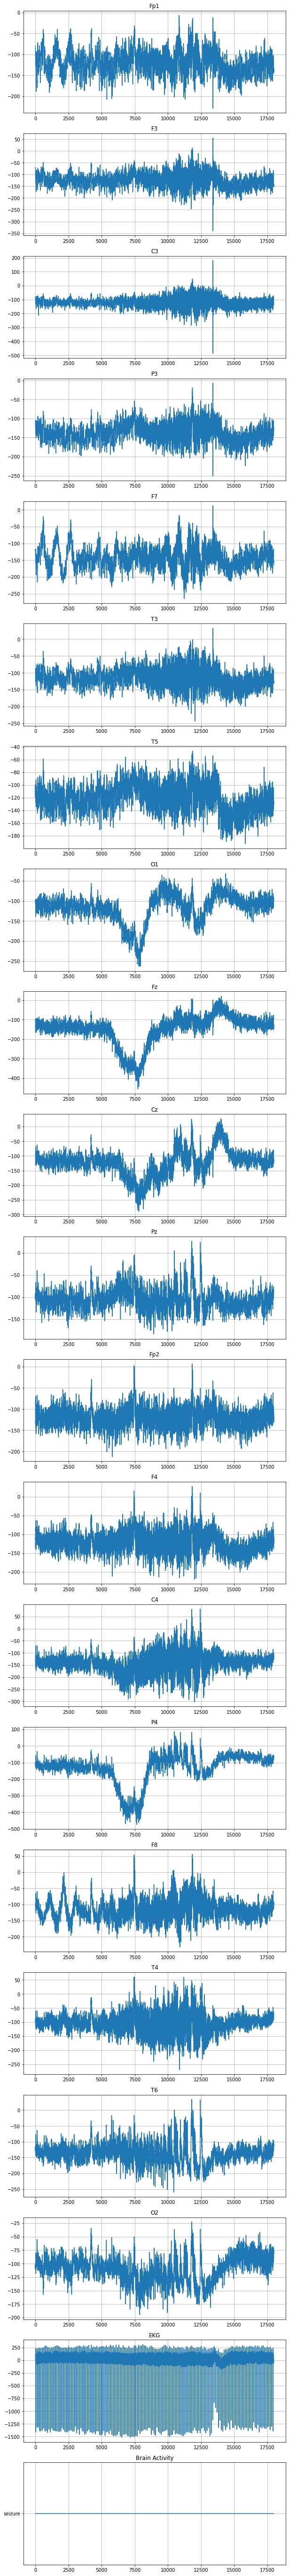

In [ ]:
fig, ax = plt.subplots(21, figsize=(10, 100))

for i, column in enumerate(df1.columns):
    ax[i].plot(df1.index, df1[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

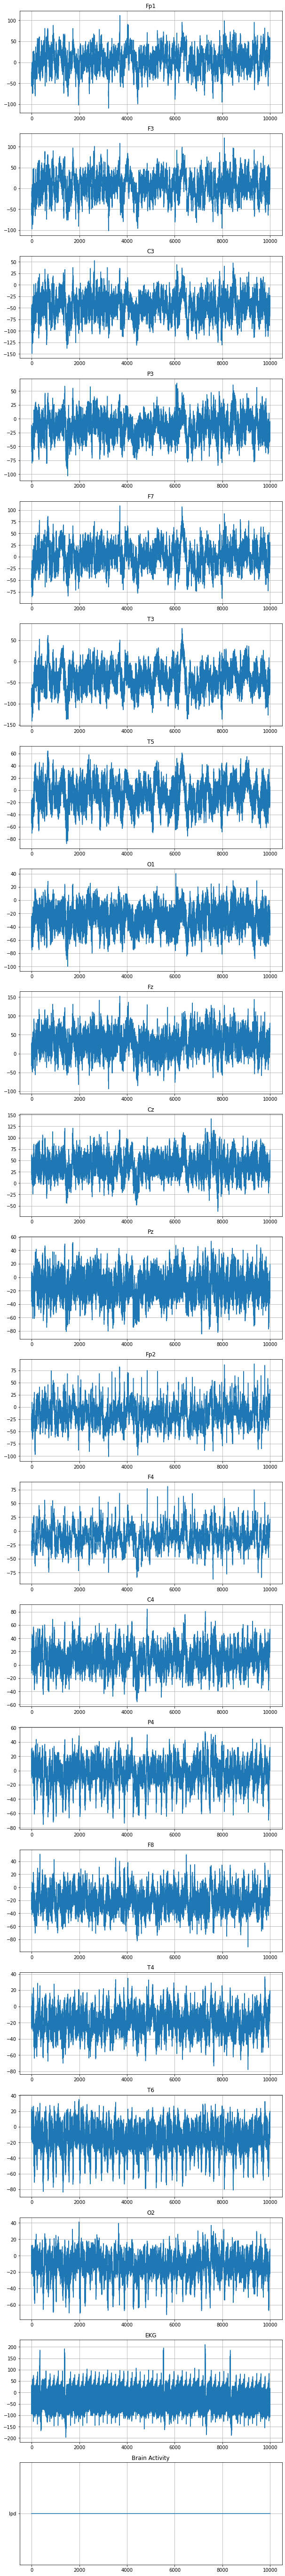

In [ ]:
fig, ax = plt.subplots(21, figsize=(10, 100))

for i, column in enumerate(df2.columns):
    ax[i].plot(df2.index, df2[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

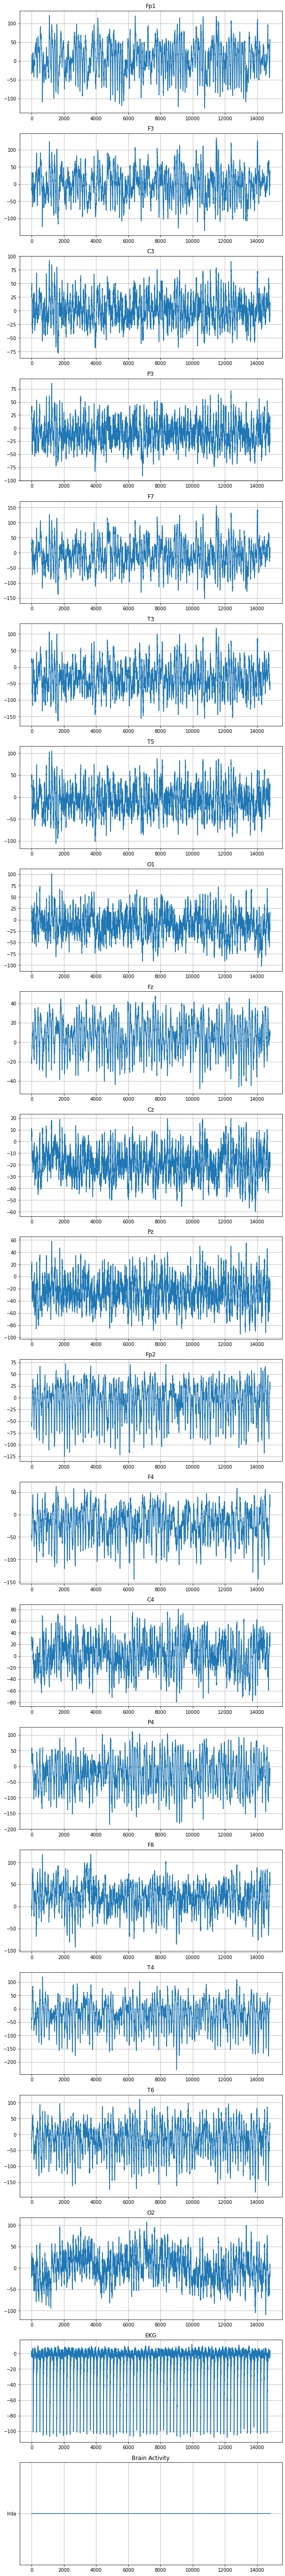

In [ ]:
fig, ax = plt.subplots(21, figsize=(10, 100))

for i, column in enumerate(df3.columns):
    ax[i].plot(df3.index, df3[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

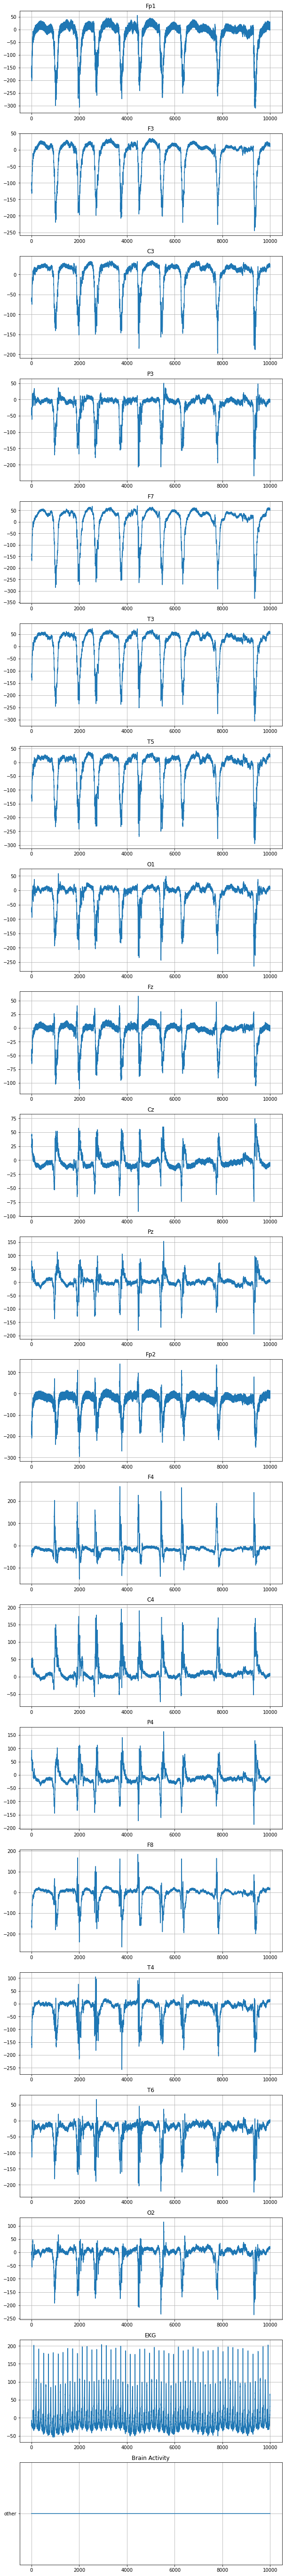

In [ ]:
fig, ax = plt.subplots(21, figsize=(10, 100))

for i, column in enumerate(df4.columns):
    ax[i].plot(df4.index, df4[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

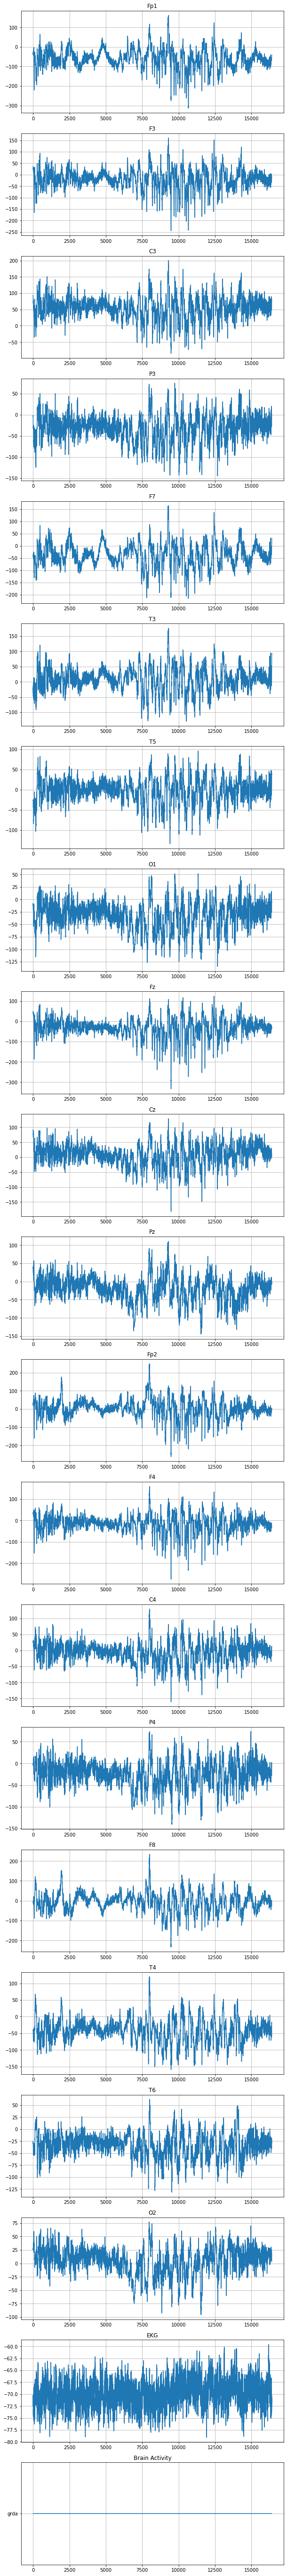

In [ ]:
fig, ax = plt.subplots(21, figsize=(10, 100))

for i, column in enumerate(df5.columns):
    ax[i].plot(df5.index, df5[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

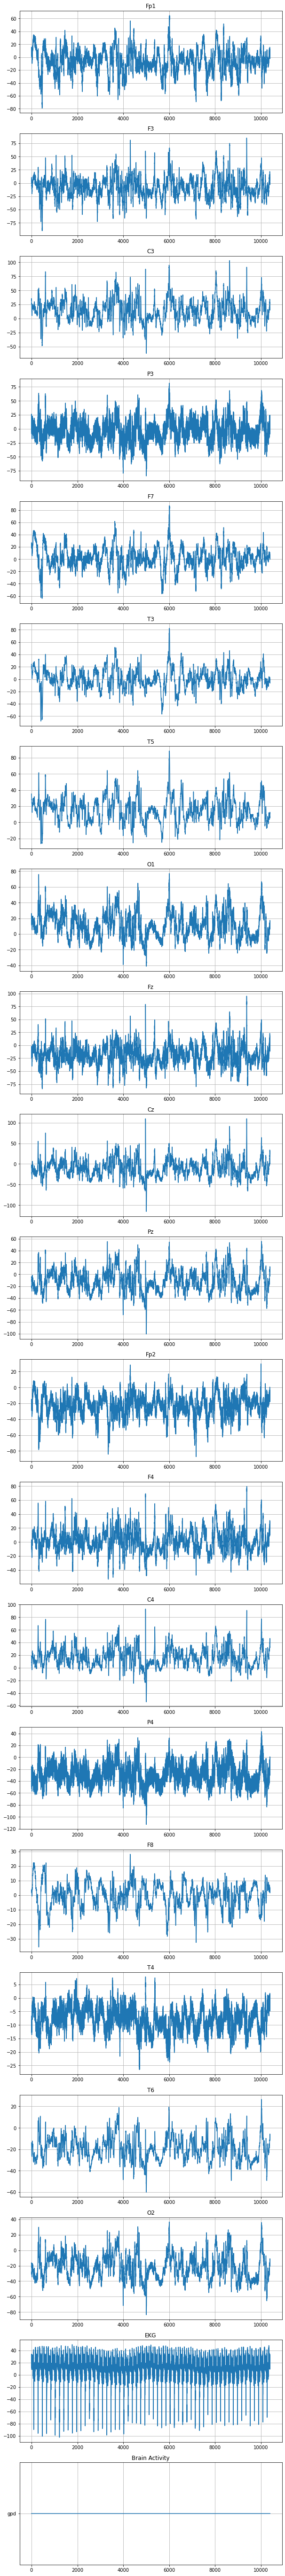

In [ ]:
fig, ax = plt.subplots(21, figsize=(10, 100))

for i, column in enumerate(df6.columns):
    ax[i].plot(df6.index, df6[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

In [ ]:
dfs = [df1, df2, df3, df4, df5, df6]

In [ ]:
combined_df = pd.concat(dfs, ignore_index=True)

In [ ]:
combined_df

Fp1         F3         C3          P3          F7          T3  \
0     -80.519997 -70.540001 -80.110001 -108.750000 -120.330002  -88.620003   
1     -80.449997 -70.330002 -81.760002 -107.669998 -120.769997  -90.820000   
2     -80.209999 -75.870003 -82.050003 -106.010002 -117.500000  -87.489998   
3     -84.709999 -75.339996 -87.480003 -108.970001 -121.410004  -94.750000   
4     -90.570000 -80.790001 -93.000000 -113.870003 -129.960007 -102.860001   
...          ...        ...        ...         ...         ...         ...   
79595   2.200000   4.680000  24.139999    1.810000    2.480000   -1.520000   
79596   7.210000   6.740000  22.450001   19.160000    5.550000   -4.850000   
79597   0.450000  -0.260000  16.540001    1.110000    0.390000   -6.090000   
79598  -2.450000  -3.070000  15.520000   -9.420000   -0.340000   -4.260000   
79599   4.370000   1.500000  15.230000    9.070000    3.430000   -6.330000   

               T5          O1          Fz          Cz  ...        Fp2  \
0     -101.750000 -104.489998  -99.129997  -90.389999  ... -77.989998   
1     -104.260002  -99.730003  -99.070000  -92.290001  ... -84.500000   
2      -99.589996  -96.820000 -119.680000  -99.360001  ... -99.440002   
3     -105.370003 -100.279999 -113.839996 -102.059998  ... -99.230003   
4     -118.599998 -101.099998 -107.660004 -102.339996  ... -95.300003   
...           ...         ...         ...         ...  ...        ...   
79595    9.040000    9.890000   -1.090000   13.310000  ... -12.430000   
79596    7.730000   12.770000    6.180000   13.500000  ...  -5.640000   
79597    6.090000    7.620000   -4.360000    3.820000  ... -12.050000   
79598    7.190000    6.030000  -11.500000   -0.360000  ... -18.020000   
79599    5.400000    9.390000   -1.730000    1.690000  ...  -9.530000   

               F4          C4          P4         F8         T4          T6  \
0      -88.830002 -112.120003 -108.110001 -95.949997 -98.360001 -121.730003   
1      -84.989998 -115.610001 -103.860001 -97.470001 -89.290001 -115.500000   
2     -104.589996 -127.529999 -113.349998 -95.870003 -96.019997 -123.879997   
3     -101.220001 -125.769997 -111.889999 -97.459999 -97.180000 -128.940002   
4      -88.930000 -115.639999  -99.800003 -97.500000 -88.730003 -114.849998   
...           ...         ...         ...        ...        ...         ...   
79595   15.260000   35.529999  -21.290001   4.710000  -0.110000   -9.420000   
79596   19.870001   35.689999   -2.020000   3.600000  -3.850000   -9.430000   
79597   13.640000   33.380001  -19.129999   2.200000  -2.660000  -10.930000   
79598    9.680000   31.770000  -30.309999   2.210000   0.370000  -11.000000   
79599   14.010000   32.970001  -10.420000   2.150000  -3.700000  -10.510000   

               O2        EKG  Brain Activity  
0     -106.449997   7.920000         seizure  
1     -102.059998  29.219999         seizure  
2     -105.790001  45.740002         seizure  
3     -109.889999  83.870003         seizure  
4     -100.250000  97.769997         seizure  
...           ...        ...             ...  
79595  -17.980000  17.490000             gpd  
79596  -15.530000  33.099998             gpd  
79597  -19.520000  14.400000             gpd  
79598  -20.790001   9.730000             gpd  
79599  -18.370001  30.000000             gpd  

[79600 rows x 21 columns]

In [ ]:
combined_df.shape

(79600, 21)

In [ ]:
combined_df.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG',
       'Brain Activity'],
      dtype='object')

In [ ]:
combined_df.duplicated().sum()

0

In [ ]:
df_new = combined_df.copy()

In [ ]:
df_new.set_index('Brain Activity', inplace=True)

In [ ]:
df_new

Fp1         F3         C3          P3          F7  \
Brain Activity                                                            
seizure        -80.519997 -70.540001 -80.110001 -108.750000 -120.330002   
seizure        -80.449997 -70.330002 -81.760002 -107.669998 -120.769997   
seizure        -80.209999 -75.870003 -82.050003 -106.010002 -117.500000   
seizure        -84.709999 -75.339996 -87.480003 -108.970001 -121.410004   
seizure        -90.570000 -80.790001 -93.000000 -113.870003 -129.960007   
...                   ...        ...        ...         ...         ...   
gpd              2.200000   4.680000  24.139999    1.810000    2.480000   
gpd              7.210000   6.740000  22.450001   19.160000    5.550000   
gpd              0.450000  -0.260000  16.540001    1.110000    0.390000   
gpd             -2.450000  -3.070000  15.520000   -9.420000   -0.340000   
gpd              4.370000   1.500000  15.230000    9.070000    3.430000   

                        T3          T5          O1          Fz          Cz  \
Brain Activity                                                               
seizure         -88.620003 -101.750000 -104.489998  -99.129997  -90.389999   
seizure         -90.820000 -104.260002  -99.730003  -99.070000  -92.290001   
seizure         -87.489998  -99.589996  -96.820000 -119.680000  -99.360001   
seizure         -94.750000 -105.370003 -100.279999 -113.839996 -102.059998   
seizure        -102.860001 -118.599998 -101.099998 -107.660004 -102.339996   
...                    ...         ...         ...         ...         ...   
gpd              -1.520000    9.040000    9.890000   -1.090000   13.310000   
gpd              -4.850000    7.730000   12.770000    6.180000   13.500000   
gpd              -6.090000    6.090000    7.620000   -4.360000    3.820000   
gpd              -4.260000    7.190000    6.030000  -11.500000   -0.360000   
gpd              -6.330000    5.400000    9.390000   -1.730000    1.690000   

                       Pz        Fp2          F4          C4          P4  \
Brain Activity                                                             
seizure        -97.040001 -77.989998  -88.830002 -112.120003 -108.110001   
seizure        -96.019997 -84.500000  -84.989998 -115.610001 -103.860001   
seizure        -91.110001 -99.440002 -104.589996 -127.529999 -113.349998   
seizure        -95.040001 -99.230003 -101.220001 -125.769997 -111.889999   
seizure        -98.510002 -95.300003  -88.930000 -115.639999  -99.800003   
...                   ...        ...         ...         ...         ...   
gpd              3.300000 -12.430000   15.260000   35.529999  -21.290001   
gpd              5.810000  -5.640000   19.870001   35.689999   -2.020000   
gpd             -0.190000 -12.050000   13.640000   33.380001  -19.129999   
gpd             -2.970000 -18.020000    9.680000   31.770000  -30.309999   
gpd             -1.420000  -9.530000   14.010000   32.970001  -10.420000   

                       F8         T4          T6          O2        EKG  
Brain Activity                                                           
seizure        -95.949997 -98.360001 -121.730003 -106.449997   7.920000  
seizure        -97.470001 -89.290001 -115.500000 -102.059998  29.219999  
seizure        -95.870003 -96.019997 -123.879997 -105.790001  45.740002  
seizure        -97.459999 -97.180000 -128.940002 -109.889999  83.870003  
seizure        -97.500000 -88.730003 -114.849998 -100.250000  97.769997  
...                   ...        ...         ...         ...        ...  
gpd              4.710000  -0.110000   -9.420000  -17.980000  17.490000  
gpd              3.600000  -3.850000   -9.430000  -15.530000  33.099998  
gpd              2.200000  -2.660000  -10.930000  -19.520000  14.400000  
gpd              2.210000   0.370000  -11.000000  -20.790001   9.730000  
gpd              2.150000  -3.700000  -10.510000  -18.370001  30.000000  

[79600 rows x 20 columns]

In [ ]:
df_new.duplicated().sum()

0

In [ ]:
combined_df.isnull().sum()

Fp1               0
F3                0
C3                0
P3                0
F7                0
T3                0
T5                0
O1                0
Fz                0
Cz                0
Pz                0
Fp2               0
F4                0
C4                0
P4                0
F8                0
T4                0
T6                0
O2                0
EKG               0
Brain Activity    0
dtype: int64

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79600 entries, 0 to 79599
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fp1             79600 non-null  float32
 1   F3              79600 non-null  float32
 2   C3              79600 non-null  float32
 3   P3              79600 non-null  float32
 4   F7              79600 non-null  float32
 5   T3              79600 non-null  float32
 6   T5              79600 non-null  float32
 7   O1              79600 non-null  float32
 8   Fz              79600 non-null  float32
 9   Cz              79600 non-null  float32
 10  Pz              79600 non-null  float32
 11  Fp2             79600 non-null  float32
 12  F4              79600 non-null  float32
 13  C4              79600 non-null  float32
 14  P4              79600 non-null  float32
 15  F8              79600 non-null  float32
 16  T4              79600 non-null  float32
 17  T6              79600 non-null 

In [ ]:
combined_df.describe()

Fp1            F3            C3            P3            F7  \
count  79600.000000  79600.000000  79600.000000  79600.000000  79600.000000   
mean     -41.583023    -34.344395    -19.593449    -43.906509    -40.681980   
std       63.754837     61.878197     68.721657     57.746696     72.008263   
min     -313.940002   -339.399994   -486.630005   -250.679993   -333.769989   
25%      -94.290001    -80.550003    -71.070000    -81.190002    -95.589996   
50%      -25.020000    -16.375000     -1.635000    -22.860001    -19.395000   
75%        5.932500      9.500000     25.799999     -3.070000     12.690000   
max      161.330002    160.059998    199.960007     86.129997    164.539993   

                 T3            T5            O1            Fz            Cz  \
count  79600.000000  79600.000000  79600.000000  79600.000000  79600.000000   
mean     -34.610428    -30.200079    -39.032101    -39.307823    -26.227566   
std       62.064209     59.604481     53.889336     77.715904     61.993980   
min     -306.700012   -295.239990   -264.320007   -455.470001   -289.450012   
25%      -85.169998    -73.110001    -72.272497    -68.324999    -41.252500   
50%      -22.600000     -8.170000    -24.190001    -15.160000    -11.510000   
75%       12.460000     12.882500      0.300000      6.650000     10.790000   
max      175.679993    105.540001    101.820000    152.490005    141.910004   

                 Pz           Fp2            F4            C4            P4  \
count  79600.000000  79600.000000  79600.000000  79600.000000  79600.000000   
mean     -35.576687    -37.024082    -37.402420    -27.161121    -44.744511   
std       46.344906     58.833183     55.770645     68.139755     71.277802   
min     -194.500000   -296.040009   -274.959991   -301.829987   -473.809998   
25%      -63.092500    -82.669998    -75.022497    -48.709999    -65.040001   
50%      -23.160000    -22.780001    -19.250000     -0.210000    -26.850000   
75%       -2.390000      1.140000     -1.190000     15.780000     -6.570000   
max      153.559998    248.360001    265.269989    195.080002    162.869995   

                 F8            T4            T6            O2           EKG  
count  79600.000000  79600.000000  79600.000000  79600.000000  79600.000000  
mean     -27.183712    -42.128857    -48.625900    -28.583515    -15.180623  
std       59.861328     49.474133     56.977894     51.839695    112.479141  
min     -263.799988   -268.660004   -259.700012   -235.990005  -1515.810059  
25%      -66.037498    -82.139999    -83.757500    -55.029999    -66.750000  
50%       -8.125000    -28.010000    -28.650000    -12.910000     -4.790000  
75%       10.520000     -6.040000    -11.770000      7.400000     18.549999  
max      234.460007    120.160004    110.320000    114.470001    310.029999

In [ ]:
combined_df.nunique()

Fp1               21817
F3                21311
C3                24593
P3                19277
F7                23752
T3                22382
T5                18862
O1                19891
Fz                24559
Cz                22225
Pz                17854
Fp2               20413
F4                19660
C4                20685
P4                20961
F8                20259
T4                17542
T6                18178
O2                18000
EKG               21705
Brain Activity        6
dtype: int64

In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype in ['object', 'bool']:
            if df[column].nunique() < 15:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float32']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(combined_df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Brain Activity']
Non-Categorical Features: []
Discrete Features: []
Continuous Features: ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']


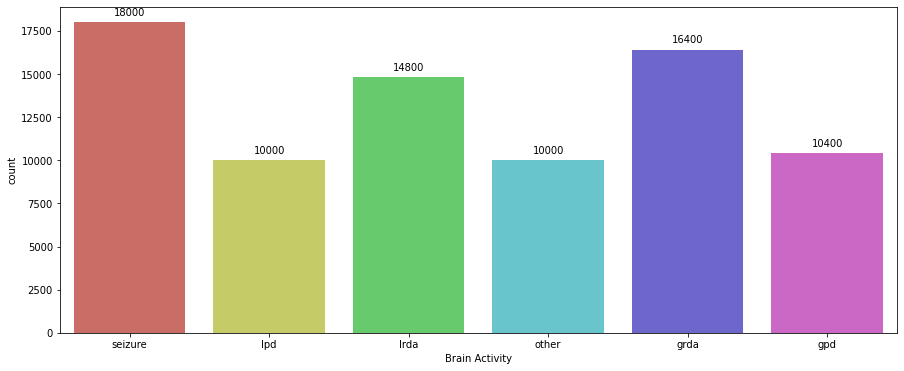

In [ ]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=combined_df, palette='hls')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

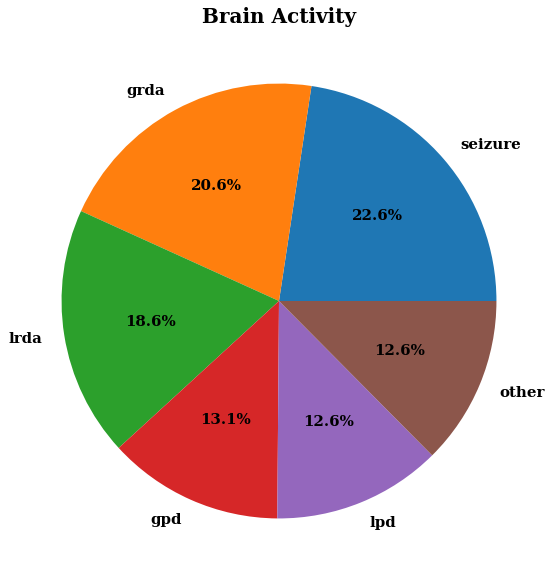

In [ ]:
for i in categorical:
    plt.figure(figsize=(20,10))
    plt.pie(combined_df[i].value_counts(), labels=combined_df[i].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont)
    plt.show()

## FEATURE ENGINEERING

In [ ]:
correlation_matrix = combined_df.corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


Fp1        F3        C3        P3        F7        T3        T5  \
Fp1  1.000000  0.922691  0.595186  0.774480  0.917383  0.693449  0.767280   
F3   0.922691  1.000000  0.801939  0.871557  0.940510  0.832053  0.873516   
C3   0.595186  0.801939  1.000000  0.819604  0.744705  0.870966  0.854174   
P3   0.774480  0.871557  0.819604  1.000000  0.860281  0.797943  0.937398   
F7   0.917383  0.940510  0.744705  0.860281  1.000000  0.872692  0.891789   
T3   0.693449  0.832053  0.870966  0.797943  0.872692  1.000000  0.903438   
T5   0.767280  0.873516  0.854174  0.937398  0.891789  0.903438  1.000000   
O1   0.686133  0.758184  0.753480  0.900825  0.791115  0.741974  0.872422   
Fz   0.737954  0.780528  0.615914  0.733756  0.728840  0.558259  0.654116   
Cz   0.580770  0.735617  0.715175  0.794581  0.666632  0.599255  0.702037   
Pz   0.580050  0.709613  0.734337  0.884185  0.681692  0.663074  0.768798   
Fp2  0.719942  0.781523  0.739804  0.704763  0.694591  0.657965  0.717110   
F4   0.648882  0.735997  0.689737  0.736090  0.658500  0.593949  0.670735   
C4   0.598511  0.712857  0.709163  0.824218  0.675653  0.596024  0.714420   
P4   0.409208  0.502206  0.516428  0.609153  0.494889  0.418400  0.514212   
F8   0.668227  0.735251  0.714517  0.749402  0.683219  0.640434  0.729792   
T4   0.614748  0.644287  0.550993  0.685715  0.656553  0.577090  0.663781   
T6   0.644395  0.722297  0.675898  0.819826  0.718828  0.641219  0.779924   
O2   0.580000  0.720442  0.792891  0.846155  0.705690  0.698193  0.809248   
EKG -0.050672 -0.107523 -0.174618 -0.098912 -0.072700 -0.116519 -0.107846   

           O1        Fz        Cz        Pz       Fp2        F4        C4  \
Fp1  0.686133  0.737954  0.580770  0.580050  0.719942  0.648882  0.598511   
F3   0.758184  0.780528  0.735617  0.709613  0.781523  0.735997  0.712857   
C3   0.753480  0.615914  0.715175  0.734337  0.739804  0.689737  0.709163   
P3   0.900825  0.733756  0.794581  0.884185  0.704763  0.736090  0.824218   
F7   0.791115  0.728840  0.666632  0.681692  0.694591  0.658500  0.675653   
T3   0.741974  0.558259  0.599255  0.663074  0.657965  0.593949  0.596024   
T5   0.872422  0.654116  0.702037  0.768798  0.717110  0.670735  0.714420   
O1   1.000000  0.756378  0.741840  0.800115  0.611448  0.625839  0.762039   
Fz   0.756378  1.000000  0.860034  0.647241  0.743054  0.757614  0.796562   
Cz   0.741840  0.860034  1.000000  0.836920  0.696975  0.780460  0.878246   
Pz   0.800115  0.647241  0.836920  1.000000  0.611226  0.716660  0.859192   
Fp2  0.611448  0.743054  0.696975  0.611226  1.000000  0.873709  0.725662   
F4   0.625839  0.757614  0.780460  0.716660  0.873709  1.000000  0.873748   
C4   0.762039  0.796562  0.878246  0.859192  0.725662  0.873748  1.000000   
P4   0.729614  0.778416  0.777285  0.687002  0.491338  0.556420  0.785188   
F8   0.689719  0.719130  0.666769  0.651687  0.887194  0.856697  0.794712   
T4   0.658191  0.612627  0.613758  0.663469  0.691589  0.735867  0.747307   
T6   0.780937  0.682363  0.751121  0.824516  0.703967  0.741435  0.850822   
O2   0.838392  0.686969  0.796202  0.860928  0.693037  0.669514  0.816792   
EKG -0.067532 -0.116340 -0.177100 -0.129287 -0.177895 -0.131753 -0.127070   

           P4        F8        T4        T6        O2       EKG  
Fp1  0.409208  0.668227  0.614748  0.644395  0.580000 -0.050672  
F3   0.502206  0.735251  0.644287  0.722297  0.720442 -0.107523  
C3   0.516428  0.714517  0.550993  0.675898  0.792891 -0.174618  
P3   0.609153  0.749402  0.685715  0.819826  0.846155 -0.098912  
F7   0.494889  0.683219  0.656553  0.718828  0.705690 -0.072700  
T3   0.418400  0.640434  0.577090  0.641219  0.698193 -0.116519  
T5   0.514212  0.729792  0.663781  0.779924  0.809248 -0.107846  
O1   0.729614  0.689719  0.658191  0.780937  0.838392 -0.067532  
Fz   0.778416  0.719130  0.612627  0.682363  0.686969 -0.116340  
Cz   0.777285  0.666769  0.613758  0.751121  0.796202 -0.177100  
Pz   0.687002  0.651687  0.663469  0.824516  0.8

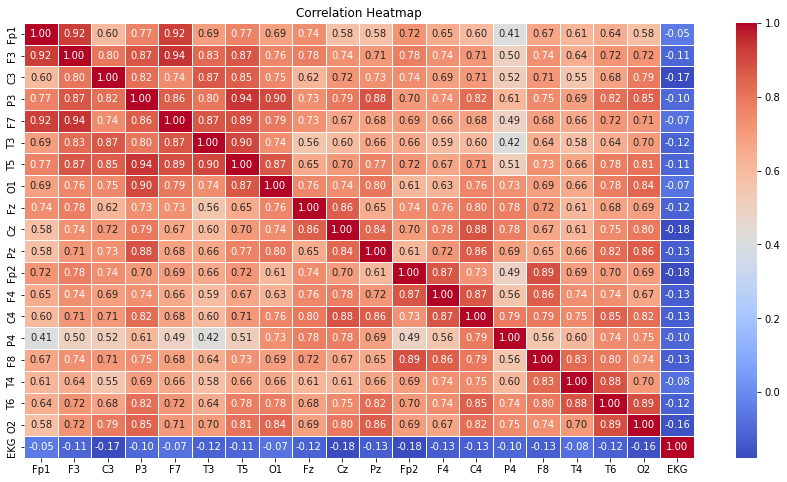

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
combined_df = combined_df[['Fp1', 'T3', 'P4', 'Brain Activity']]

In [ ]:
brain_activities = combined_df['Brain Activity'].unique()

mapping = {activity: idx for idx, activity in enumerate(brain_activities)}

combined_df['Brain Activity Numerical'] = combined_df['Brain Activity'].map(mapping)

In [ ]:
combined_df

Fp1          T3          P4 Brain Activity  \
0     -80.519997  -88.620003 -108.110001        seizure   
1     -80.449997  -90.820000 -103.860001        seizure   
2     -80.209999  -87.489998 -113.349998        seizure   
3     -84.709999  -94.750000 -111.889999        seizure   
4     -90.570000 -102.860001  -99.800003        seizure   
...          ...         ...         ...            ...   
79595   2.200000   -1.520000  -21.290001            gpd   
79596   7.210000   -4.850000   -2.020000            gpd   
79597   0.450000   -6.090000  -19.129999            gpd   
79598  -2.450000   -4.260000  -30.309999            gpd   
79599   4.370000   -6.330000  -10.420000            gpd   

       Brain Activity Numerical  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
...                         ...  
79595                         5  
79596                         5  
79597                         5  
79598                         5  
79599                         5  

[79600 rows x 5 columns]

In [ ]:
combined_df = combined_df.drop('Brain Activity', axis = 1)

#### DEFINE X AND Y

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [ ]:
X = combined_df.drop('Brain Activity Numerical', axis = 1)

In [ ]:
y = combined_df['Brain Activity Numerical']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,
                                                    random_state=42)

## MODEL CREATION 

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy}")

Accuracy: 0.6545226130653267


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3600
           1       0.37      0.18      0.24      2000
           2       0.47      0.61      0.53      2960
           3       0.49      0.44      0.47      2000
           4       0.79      0.79      0.79      3280
           5       0.58      0.62      0.60      2080

    accuracy                           0.65     15920
   macro avg       0.60      0.60      0.60     15920
weighted avg       0.64      0.65      0.64     15920

Confusion Matrix:
 [[3469   11   61   14   40    5]
 [   0  357 1485   73    3   82]
 [ 117  583 1812  128   33  287]
 [ 165    6   17  887  542  383]
 [  34    5  117  356 2601  167]
 [   3    0  384  338   61 1294]]


In the context of classification metrics, "precision," "recall," "f1-score," and "support" are terms commonly used to evaluate the performance of a classification model. These metrics are calculated based on the confusion matrix, which is a table that summarizes the performance of a classification algorithm.

Here's a detailed explanation of each term:

1. **Precision:**
   - Precision is a measure of the accuracy of the positive predictions made by a classification model.
   - It is calculated as the ratio of true positive predictions to the sum of true positives and false positives.
   - Formula: Precision = TP / (TP + FP)
   - Precision provides insights into the model's ability to avoid false positives. A high precision indicates that the model is making accurate positive predictions.

2. **Recall (Sensitivity or True Positive Rate):**
   - Recall is a measure of the ability of the model to capture all the positive instances in the dataset.
   - It is calculated as the ratio of true positive predictions to the sum of true positives and false negatives.
   - Formula: Recall = TP / (TP + FN)
   - Recall is particularly important in scenarios where capturing all positive instances is crucial. For example, in medical diagnosis, it is essential to identify all actual cases of a disease.

3. **F1-Score:**
   - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.
   - It is calculated using the formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
   - The F1-score ranges between 0 and 1, where a higher score indicates a better balance between precision and recall.

4. **Support:**
   - Support refers to the number of occurrences of each class in the actual dataset.
   - It is the number of true instances for each class.
   - Support is not a metric used for evaluating the model's performance but provides context for the other metrics.

In summary:
- **Precision** measures how many of the predicted positive instances are truly positive.
- **Recall** measures how many of the true positive instances were captured by the model.
- **F1-score** balances precision and recall, providing a single metric that considers both false positives and false negatives.
- **Support** gives the number of true instances for each class, providing context for the other metrics.

In [ ]:
import scikitplot as skplt

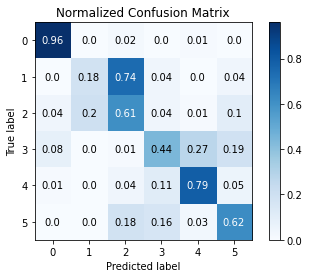

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## DECESION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.7712939698492463


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      3600
           1       0.62      0.61      0.61      2000
           2       0.69      0.69      0.69      2960
           3       0.74      0.74      0.74      2000
           4       0.81      0.82      0.82      3280
           5       0.70      0.70      0.70      2080

    accuracy                           0.77     15920
   macro avg       0.75      0.75      0.75     15920
weighted avg       0.77      0.77      0.77     15920

Confusion Matrix:
 [[3396    5   71   82   45    1]
 [   6 1218  560   12   59  145]
 [  75  530 2041   49  124  141]
 [  61   19   45 1472  222  181]
 [  48   49   98  229 2687  169]
 [   2  141  157  153  162 1465]]


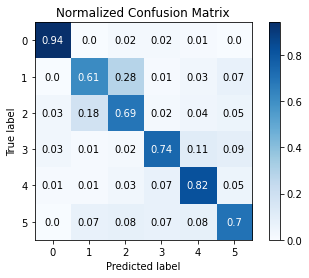

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.8107412060301508


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      3600
           1       0.66      0.74      0.70      2000
           2       0.78      0.67      0.72      2960
           3       0.77      0.79      0.78      2000
           4       0.89      0.79      0.84      3280
           5       0.71      0.85      0.78      2080

    accuracy                           0.81     15920
   macro avg       0.79      0.80      0.80     15920
weighted avg       0.82      0.81      0.81     15920

Confusion Matrix:
 [[3482    2   72   15   28    1]
 [   0 1489  319   11   14  167]
 [  57  640 1996   23   73  171]
 [  69    4   32 1575  142  178]
 [  35   45  116  302 2590  192]
 [   0   72   40  128   65 1775]]


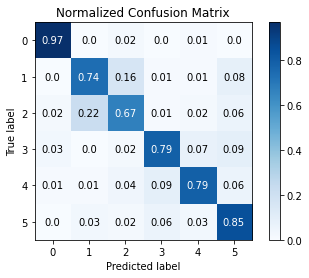

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.8154522613065327


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      3600
           1       0.67      0.72      0.69      2000
           2       0.76      0.71      0.74      2960
           3       0.79      0.80      0.79      2000
           4       0.87      0.83      0.85      3280
           5       0.74      0.80      0.77      2080

    accuracy                           0.82     15920
   macro avg       0.80      0.80      0.80     15920
weighted avg       0.82      0.82      0.82     15920

Confusion Matrix:
 [[3469    7   65   26   32    1]
 [   2 1435  374   19   21  149]
 [  62  534 2111   27   90  136]
 [  66    8   31 1594  150  151]
 [  38   56   95  231 2713  147]
 [   0   96   94  129  101 1660]]


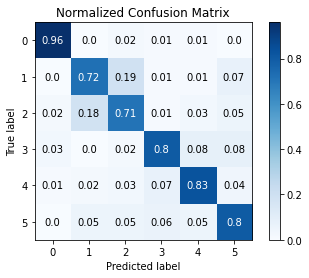

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [ ]:
accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Random Forest': rf_accuracy,
}

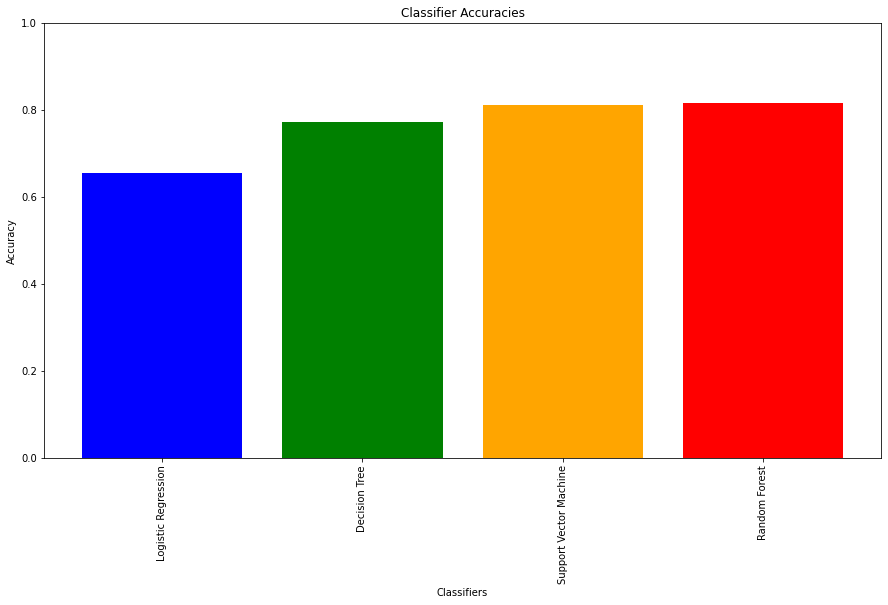

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
combined_df.columns

Index(['Fp1', 'T3', 'P4', 'Brain Activity Numerical'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new= scaler.transform(X_test)

The StandardScaler is a preprocessing technique used in machine learning to standardize the features of a dataset. Standardization involves transforming the data so that it has a mean of 0 and a standard deviation of 1. This process is also known as Z-score normalization.

Here's how the StandardScaler works:

Calculate Mean and Standard Deviation:

For each feature (column) in the dataset, calculate the mean and standard deviation.
Standardization Formula:

For each data point in a feature, apply the following formula:
Standardized Value
=
Original Value
−
Mean
Standard Deviation
Standardized Value=
Standard Deviation
Original Value−Mean
​

Result:

After standardization, each feature will have a mean of 0 and a standard deviation of 1.
The StandardScaler is beneficial in scenarios where features have different scales or units. Standardizing the features ensures that they are on a similar scale, which can be important for algorithms that are sensitive to the scale of the input features. Some machine learning algorithms, such as support vector machines, k-means clustering, and principal component analysis, work more effectively when features are standardized.

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_new.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,534
Trainable params: 2,534
Non-trainable params: 0
_________________________________________________________________


The provided model summary belongs to a neural network model built using the Keras library with a Sequential API. Let's break down the key components of the model summary:

### Model Architecture:
- **Model Type:** Sequential
  - The Sequential model is a linear stack of layers, where you can simply add one layer at a time.
  
### Layers:
1. **Dense Layer (dense_6):**
   - **Output Shape:** (None, 64)
   - **Number of Parameters:** 256
   - This layer is a fully connected (dense) layer with 64 units. The output shape is (None, 64), indicating that the layer produces an output vector with 64 values for each input.

2. **Dense Layer (dense_7):**
   - **Output Shape:** (None, 32)
   - **Number of Parameters:** 2080
   - Another fully connected layer with 32 units. The output shape is (None, 32).

3. **Dense Layer (dense_8):**
   - **Output Shape:** (None, 6)
   - **Number of Parameters:** 198
   - Final dense layer with 6 units, representing the output layer for a classification task with 6 classes. The output shape is (None, 6).

### Total Parameters:
- **Total Parameters:** 2,534
- **Trainable Parameters:** 2,534
- **Non-trainable Parameters:** 0
  - Trainable parameters are the weights and biases in the layers that the model learns during training. Non-trainable parameters could be, for example, the parameters in a BatchNormalization layer, but in this case, there are none.

### Note:
- The activation function used in each dense layer is not specified in the provided summary. By default, Keras uses the linear activation function.
- The model is designed for a classification task with 6 classes based on the last dense layer having 6 units.
- The model architecture is relatively simple with one input layer, two hidden layers, and one output layer. Adjustments to the architecture, such as activation functions and layer sizes, can be made based on the specific requirements of your task.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In Keras, the model.compile method is used to configure the learning process of a neural network model before training. It essentially sets up the model for training by specifying three key components:

Optimizer: The optimizer is the algorithm responsible for updating the weights of the neural network during training. It controls how the model adjusts its internal parameters to minimize the loss function. Common optimizers include SGD (Stochastic Gradient Descent), Adam, RMSprop, etc.

Loss Function: The loss function, or objective function, quantifies how well the model is performing. It measures the difference between the predicted output and the actual target values. The goal during training is to minimize this loss. The choice of the loss function depends on the type of problem (e.g., classification, regression) and the nature of the output.

Metrics: Metrics are used to evaluate the performance of the model. While the loss function is used during training to guide the optimization process, metrics provide additional measures of model performance that are easier to interpret. Common metrics for classification tasks include accuracy, precision, recall, and F1-score.

In [ ]:
history = model.fit(X_train_new, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1592/1592 [==============================] - 3s 2ms/step - loss: 0.6569 - accuracy: 0.7555 - val_loss: 0.5358 - val_accuracy: 0.7988
Epoch 2/10
1592/1592 [==============================] - 4s 2ms/step - loss: 0.5163 - accuracy: 0.8050 - val_loss: 0.5170 - val_accuracy: 0.8056
Epoch 3/10
1592/1592 [==============================] - 3s 2ms/step - loss: 0.4997 - accuracy: 0.8112 - val_loss: 0.5007 - val_accuracy: 0.8116
Epoch 4/10
1592/1592 [==============================] - 3s 2ms/step - loss: 0.4922 - accuracy: 0.8139 - val_loss: 0.4944 - val_accuracy: 0.8138
Epoch 5/10
1592/1592 [==============================] - 4s 2ms/step - loss: 0.4877 - accuracy: 0.8148 - val_loss: 0.4976 - val_accuracy: 0.8076
Epoch 6/10
1592/1592 [==============================] - 3s 2ms/step - loss: 0.4839 - accuracy: 0.8148 - val_loss: 0.4881 - val_accuracy: 0.8152
Epoch 7/10
1592/1592 [==============================] - 4s 2ms/step - loss: 0.4819 - accuracy: 0.8163 - val_loss: 0.4861 - val_accuracy:

In [ ]:
y_test_one_hot = to_categorical(y_test)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_new, y_test_one_hot)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

498/498 [==============================] - 1s 1ms/step - loss: 0.4874 - accuracy: 0.8144
Test Accuracy: 81.44%


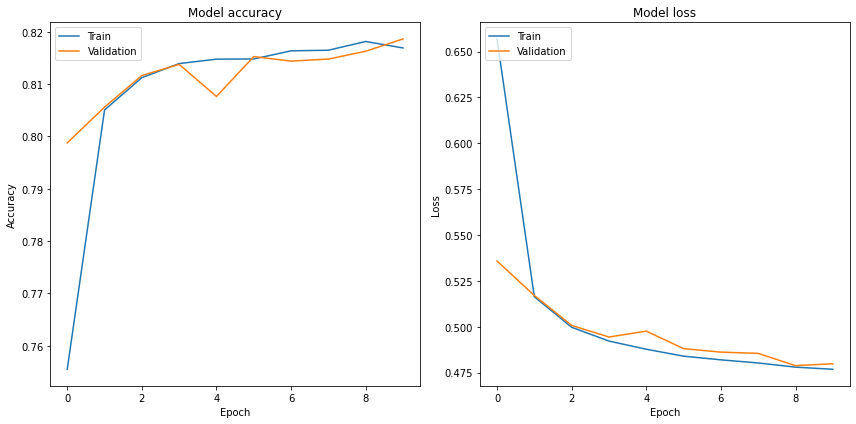

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense

In [ ]:
input_shape = (X_train_new.shape[1], 1)

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model_cnn.add(Flatten())
model_cnn.add(Dense(units=128, activation='relu'))
model_cnn.add(Dense(units=6, activation='softmax'))

1. **Input Shape Definition:**
   - The input data shape is defined, indicating the number of features and channels.

2. **Model Initialization:**
   - A sequential model is initialized. In a sequential model, layers are added one by one in a linear sequence.

3. **Convolutional Layer Addition:**
   - A 1D convolutional layer is added to the model.
     - `filters`: Specifies the number of filters in the convolutional layer.
     - `kernel_size`: Sets the size of the convolutional kernel.

4. **Flatten Layer Addition:**
   - A flatten layer is added to the model.
     - This layer is used to flatten the multi-dimensional data into a one-dimensional array.

5. **Dense Layer Addition (1st):**
   - A dense layer with ReLU activation is added to the model.
     - This layer is fully connected, meaning each neuron in the layer is connected to every neuron in the previous layer.

6. **Dense Layer Addition (2nd):**
   - Another dense layer with softmax activation is added to the model.
     - Softmax activation is often used in the output layer for multi-class classification problems.

In [ ]:
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 64)             256       
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 6)                 774       
                                                                 
Total params: 9,350
Trainable params: 9,350
Non-trainable params: 0
_________________________________________________________________


1. **Conv1D Layer:**
   - Type: Conv1D
   - Output Shape: (None, 1, 64)
   - Parameters: 256
   - Explanation: This layer applies 64 filters of size 3 to the input data, resulting in an output shape of (1, 64) for each filter.

2. **Flatten Layer:**
   - Type: Flatten
   - Output Shape: (None, 64)
   - Parameters: 0
   - Explanation: This layer flattens the output from the Conv1D layer into a one-dimensional array with 64 elements.

3. **Dense Layer (1st):**
   - Type: Dense
   - Output Shape: (None, 128)
   - Parameters: 8,320
   - Explanation: This fully connected layer has 128 neurons with a ReLU activation function. It takes the flattened input from the previous layer.

4. **Dense Layer (2nd):**
   - Type: Dense
   - Output Shape: (None, 6)
   - Parameters: 774
   - Explanation: The final layer is another fully connected layer with 6 neurons, representing the number of classes in the classification task. It uses the softmax activation function.

5. **Total Parameters:**
   - Total trainable parameters in the model: 9,350
   - Non-trainable parameters: 0
   - Trainable parameters are the weights and biases in the model that are updated during training to learn from the data. Non-trainable parameters are fixed and not updated during training.

This model architecture is suitable for a multi-class classification problem where the input data has sequential features. The convolutional layer helps capture local patterns in the input sequence.

In [ ]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- **`X_train_new.reshape(X_train_new.shape[0], X_train_new.shape[1], 1)`**: This reshapes the input data (`X_train_new`) to be compatible with the Conv1D layer's input shape. It adds an additional dimension with size 1, indicating that the data has a single channel. The reshaped data is then used for training.

- **`y_train_one_hot`**: This represents the one-hot encoded labels corresponding to the training data.

- **`epochs=20`**: This specifies the number of times the entire dataset will be passed forward and backward through the neural network during training.

- **`batch_size=32`**: It defines the number of samples that will be used in each iteration of training.

- **`validation_split=0.2`**: This parameter is used for validation during training. It indicates that 20% of the training data will be used as a validation set, and the model's performance will be evaluated on this set after each epoch.

The `fit` method will train the model for the specified number of epochs, and the training/validation loss and accuracy metrics for each epoch will be stored in the `history_cnn` variable. This information can be used to analyze the training process and evaluate the model's performance.

In [ ]:
history_cnn = model_cnn.fit(X_train_new.reshape(X_train_new.shape[0], X_train_new.shape[1], 1), y_train_one_hot, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1592/1592 [==============================] - 3s 2ms/step - loss: 0.4714 - accuracy: 0.8182 - val_loss: 0.4768 - val_accuracy: 0.8167
Epoch 2/20
1592/1592 [==============================] - 4s 2ms/step - loss: 0.4711 - accuracy: 0.8185 - val_loss: 0.4761 - val_accuracy: 0.8150
Epoch 3/20
1592/1592 [==============================] - 4s 3ms/step - loss: 0.4704 - accuracy: 0.8171 - val_loss: 0.4814 - val_accuracy: 0.8189
Epoch 4/20
1592/1592 [==============================] - 3s 2ms/step - loss: 0.4689 - accuracy: 0.8181 - val_loss: 0.4739 - val_accuracy: 0.8179
Epoch 5/20
1592/1592 [==============================] - 4s 3ms/step - loss: 0.4676 - accuracy: 0.8183 - val_loss: 0.4713 - val_accuracy: 0.8203
Epoch 6/20
1592/1592 [==============================] - 3s 2ms/step - loss: 0.4674 - accuracy: 0.8189 - val_loss: 0.4699 - val_accuracy: 0.8197
Epoch 7/20
1592/1592 [==============================] - 3s 2ms/step - loss: 0.4669 - accuracy: 0.8177 - val_loss: 0.4689 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model_cnn.evaluate(X_test_new.reshape(X_test_new.shape[0], X_test_new.shape[1], 1), y_test_one_hot)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

498/498 [==============================] - 1s 1ms/step - loss: 0.4673 - accuracy: 0.8202
Test Accuracy: 82.02%


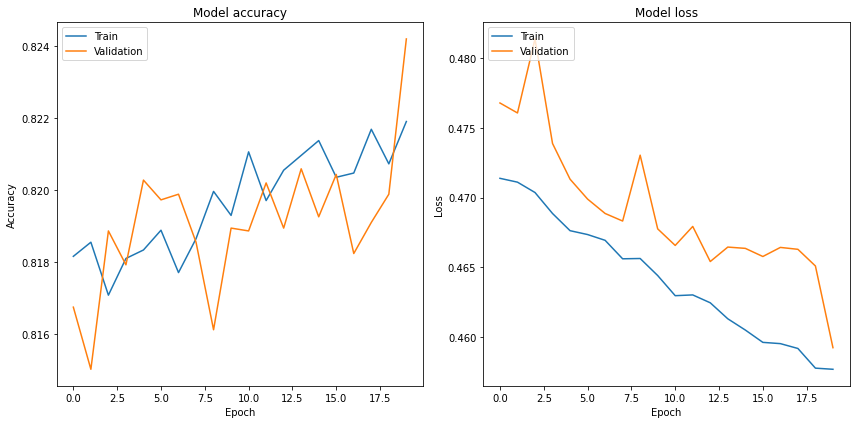

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()